In [788]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
#%load_ext google.colab.data_table #extension permettant d'examiner plus facilement les dataset grace à l'ajout d'une case "Filter"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [789]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import seaborn as sns
%pip install dataprep #librairie permettant de faire l'analyse exploratoire des donnés
from dataprep.datasets import load_dataset
from dataprep.eda import create_report
%pip install kneed #librairie permettant de calculer le numbre de cluster

In [790]:
#%pip install cohere
#%pip install openai
#%pip install tiktoken
#%pip install fastapi
#%pip install kaleido
#%pip install python-multipart
#%pip install uvicorn
#%pip install sqlalchemy
#%pip install bokeh


In [791]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projet 9/volaille2017.csv', index_col=0)
# index_col=0 supprime l'apparition de la colonne unnamed_0 du a un problème de header

In [792]:
df.head()


,Zone,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evo_PIB_5ans,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index
0,Afghanistan,0.00,-2.80,498.34,-20.05,1.53,57000000.00,0.00,29000000.00,55000000.00,28000000.00,5590.38,7.02,0.00,10.00,44.06
1,Afrique du Sud,0.00,-0.28,6330.41,-17.61,35.69,2118000000.00,63000000.00,514000000.00,2035000000.00,1667000000.00,9353.55,4.51,15.00,15.00,67.02
2,Albanie,440.00,0.38,4259.17,6.67,16.36,47000000.00,0.00,38000000.00,47000000.00,13000000.00,1603.53,0.85,20.00,20.00,67.75
3,Algérie,51470.00,-0.92,3886.84,-26.30,6.38,277000000.00,0.00,2000000.00,264000000.00,275000000.00,1340.39,8.85,19.00,19.00,48.60
4,Allemagne,1313490.00,0.59,41973.43,1.82,19.47,1739000000.00,646000000.00,842000000.00,1609000000.00,1514000000.00,439.90,1.79,19.00,19.00,79.71


Description du dataset :
* Zone : pays
* Quantite_exporte_de_france : quantité de poulet exporté par la france en kg
* Stabilité politique : indice de stabilité politique
* PIB_par_hab_2017_euro : PIB par habitant pour l'année 2017 en euro
* Evo_PIB_5ans : Evolution du PIB/habitant de 2012 à 2017
* Dispo_alim(kg/Pers/an) : Quantité de nourriture disponible pour la consommation huamine d'un pays en Kg par personne et par an
* Disponibilité intérieure : Quantité de nourriture disponible pour la consommation humaine d'un pays après avoir pris en compte les exportations en kg
* Exportation - quantité : Exportation de poulet du pays en kg
* Importations - quantité : Importation de poulet par pays en kg
* Nourriture_total : Poids de poulets total disponible pour la nourriture humaine du pays en kg
* Production :Poids de poulet produit par le pays en kg
* Distance_france : Distance entre la capitale du pays et Paris en km
* Droit de douane : Montant des droit de douane en %
* tva : TVA en %
* Taux_impot_sur_vente :Taux d'impot sur les ventes en %
* Doing_business_index :Plus l'index est élevé, plus il est facile de faire du business avec un pays

In [793]:
#renommage de la colonne tonnage exporte pour quelle soit plus explicite
df.rename(columns={'tonnage exporte':'tonnage exporte de France', 'Evo_PIB_5ans':'Evolution PIB/Habitant'}, inplace = True)

In [794]:
df.shape

(172, 16)

In [795]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Zone                        172 non-null    object 
 1   Quantite_exporte_de_france  172 non-null    float64
 2   Stabilite_politique         172 non-null    float64
 3   PIB_par_hab_2017_euro       172 non-null    float64
 4   Evolution PIB/Habitant      172 non-null    float64
 5   Dispo_alim(Kg/Pers/an)      172 non-null    float64
 6   Disponibilité intérieure    172 non-null    float64
 7   Exportations - Quantité     172 non-null    float64
 8   Importations - Quantité     172 non-null    float64
 9   Nourriture_total            172 non-null    float64
 10  Production                  172 non-null    float64
 11  Distance_france             172 non-null    float64
 12  Droit de douane             172 non-null    float64
 13  tva                         172 non

In [796]:
df.isna().mean()

Zone                         0.00
Quantite_exporte_de_france   0.00
Stabilite_politique          0.00
PIB_par_hab_2017_euro        0.00
Evolution PIB/Habitant       0.00
Dispo_alim(Kg/Pers/an)       0.00
Disponibilité intérieure     0.00
Exportations - Quantité      0.00
Importations - Quantité      0.00
Nourriture_total             0.00
Production                   0.00
Distance_france              0.00
Droit de douane              0.00
tva                          0.00
taux_impot_sur_vente         0.00
Doing_business_index         0.00
dtype: float64

In [797]:
df.duplicated().sum()

0

In [798]:
df.nunique()

Zone                          172
Quantite_exporte_de_france     62
Stabilite_politique           135
PIB_par_hab_2017_euro         172
Evolution PIB/Habitant        172
Dispo_alim(Kg/Pers/an)        169
Disponibilité intérieure      136
Exportations - Quantité        50
Importations - Quantité        84
Nourriture_total              131
Production                    125
Distance_france               171
Droit de douane               136
tva                            31
taux_impot_sur_vente           30
Doing_business_index          161
dtype: int64

In [799]:
df = df.set_index('Zone')

In [800]:
X = df.values
X[:5]

array([[ 0.00000000e+00, -2.80000000e+00,  4.98340000e+02,
        -2.00547364e+01,  1.53000000e+00,  5.70000000e+07,
         0.00000000e+00,  2.90000000e+07,  5.50000000e+07,
         2.80000000e+07,  5.59038100e+03,  7.02000000e+00,
         0.00000000e+00,  1.00000000e+01,  4.40600000e+01],
       [ 0.00000000e+00, -2.80000000e-01,  6.33041000e+03,
        -1.76097019e+01,  3.56900000e+01,  2.11800000e+09,
         6.30000000e+07,  5.14000000e+08,  2.03500000e+09,
         1.66700000e+09,  9.35355200e+03,  4.51000000e+00,
         1.50000000e+01,  1.50000000e+01,  6.70200000e+01],
       [ 4.40000000e+02,  3.80000000e-01,  4.25917000e+03,
         6.67197378e+00,  1.63600000e+01,  4.70000000e+07,
         0.00000000e+00,  3.80000000e+07,  4.70000000e+07,
         1.30000000e+07,  1.60353400e+03,  8.50000000e-01,
         2.00000000e+01,  2.00000000e+01,  6.77500000e+01],
       [ 5.14700000e+04, -9.20000000e-01,  3.88684000e+03,
        -2.63031074e+01,  6.38000000e+00,  2.77000000

suppression de \xa0 des donnés

In [801]:
X.shape

(172, 15)

In [802]:
names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe', 'Égypte',
       'Émirats arabes unis', 'Équateur', 'États-Unis d'Amérique', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=172)

In [803]:
features = df.columns
features

Index(['Quantite_exporte_de_france', 'Stabilite_politique',
       'PIB_par_hab_2017_euro', 'Evolution PIB/Habitant',
       'Dispo_alim(Kg/Pers/an)', 'Disponibilité intérieure',
       'Exportations - Quantité', 'Importations - Quantité',
       'Nourriture_total', 'Production', 'Distance_france', 'Droit de douane',
       'tva', 'taux_impot_sur_vente', 'Doing_business_index'],
      dtype='object')

In [804]:
scaler = StandardScaler()

In [805]:
scaler.fit(X)

StandardScaler()

In [806]:
X_scaled = scaler.transform(X)
X_scaled[:5]

array([[-0.10490273, -3.07522858, -0.71474613, -0.92845505, -1.18143472,
        -0.28700723, -0.22715699, -0.3210665 , -0.28051267, -0.27574216,
        -0.11713823,  0.25185851, -3.02460847, -1.06169391, -1.58937893],
       [-0.10490273, -0.24601568, -0.38766624, -0.84141816,  0.97865768,
         0.6630779 , -0.0892207 ,  2.29654176,  0.65388937,  0.38855948,
         0.84006082, -0.33266119, -0.17490341, -0.12034976,  0.19821349],
       [-0.10482768,  0.49496866, -0.50382756,  0.02294653, -0.24366627,
        -0.29161705, -0.22715699, -0.27249233, -0.28428804, -0.2818218 ,
        -1.13123143, -1.18498872,  0.77499828,  0.8209944 ,  0.25504896],
       [-0.09612267, -0.96454594, -0.52470894, -1.15088086, -0.87474713,
        -0.18559106, -0.22715699, -0.46678903, -0.18188135, -0.17563081,
        -1.19816466,  0.67802227,  0.58501794,  0.63272557, -1.235909  ],
       [ 0.11916036,  0.7307364 ,  1.6113007 , -0.14988818, -0.0470068 ,
         0.48836549,  1.18723736,  4.06680055, 

In [807]:
X_scaled = scaler.fit_transform(X)

In [808]:
#vérification que les moyennes sont bien à 0 et les ecartypes à 1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [809]:
n_components = 14

In [810]:
pca = PCA(n_components=n_components)

In [811]:
pca.fit(X_scaled)

PCA(n_components=14)

In [812]:
pca.explained_variance_ratio_

array([2.67941670e-01, 1.83014123e-01, 1.36898488e-01, 7.99382662e-02,
       6.81200049e-02, 6.29795783e-02, 4.58957954e-02, 4.52591209e-02,
       3.28723057e-02, 2.51761320e-02, 2.20109376e-02, 1.91736519e-02,
       1.05996461e-02, 9.34342075e-05])

In [813]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([2.679e+01, 1.830e+01, 1.369e+01, 7.990e+00, 6.810e+00, 6.300e+00,
       4.590e+00, 4.530e+00, 3.290e+00, 2.520e+00, 2.200e+00, 1.920e+00,
       1.060e+00, 1.000e-02])

In [814]:
scree_cum = scree.cumsum().round()
scree_cum

array([ 27.,  45.,  59.,  67.,  74.,  80.,  84.,  89.,  92.,  95.,  97.,
        99., 100., 100.])

In [815]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

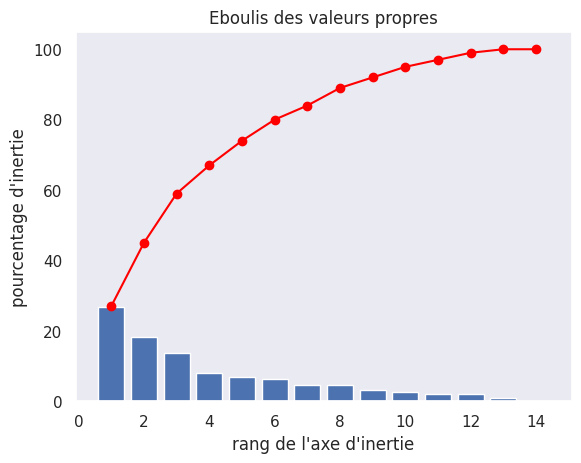

In [816]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

L'éboulis des valeurs propres montre que 7 composantes principales expliquent 84% de l'inertie

In [817]:
pcs = pca.components_

In [818]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.06,0.12,0.22,-0.03,0.21,0.44,0.39,0.20,0.45,0.45,-0.02,-0.17,0.05,-0.06,0.25
1,-0.15,-0.35,-0.37,0.08,-0.13,0.23,0.10,-0.10,0.23,0.22,0.27,0.36,-0.27,-0.31,-0.38
2,-0.09,0.32,0.21,0.07,0.34,-0.11,-0.14,0.11,-0.11,-0.13,0.37,-0.07,-0.51,-0.49,0.12
3,0.44,-0.32,0.02,-0.40,-0.21,-0.03,-0.03,0.55,-0.03,-0.07,-0.23,-0.11,-0.30,-0.17,-0.06
4,0.50,0.04,0.08,0.79,-0.29,-0.01,0.07,-0.02,-0.01,0.01,-0.08,-0.04,-0.06,-0.12,0.03
5,0.59,0.23,0.04,-0.21,0.35,-0.08,0.24,-0.09,-0.07,-0.02,0.22,0.45,0.17,0.07,-0.27
6,0.29,-0.02,-0.18,-0.28,-0.26,-0.01,0.12,-0.48,-0.02,0.05,0.42,-0.53,-0.09,0.00,0.15
7,0.02,0.06,-0.35,0.17,-0.01,0.05,-0.19,0.57,0.04,-0.03,0.57,-0.08,0.19,0.34,0.07
8,0.07,-0.44,-0.37,0.20,0.66,-0.12,0.18,-0.02,-0.11,-0.07,-0.16,-0.31,0.05,-0.07,0.04
9,-0.24,0.00,0.31,0.08,-0.11,-0.16,0.49,0.18,-0.15,-0.06,0.15,-0.34,0.08,0.04,-0.60


In [819]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evolution PIB/Habitant,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index
F1,0.06,0.12,0.22,-0.03,0.21,0.44,0.39,0.20,0.45,0.45,-0.02,-0.17,0.05,-0.06,0.25
F2,-0.15,-0.35,-0.37,0.08,-0.13,0.23,0.10,-0.10,0.23,0.22,0.27,0.36,-0.27,-0.31,-0.38
F3,-0.09,0.32,0.21,0.07,0.34,-0.11,-0.14,0.11,-0.11,-0.13,0.37,-0.07,-0.51,-0.49,0.12
F4,0.44,-0.32,0.02,-0.40,-0.21,-0.03,-0.03,0.55,-0.03,-0.07,-0.23,-0.11,-0.30,-0.17,-0.06
F5,0.50,0.04,0.08,0.79,-0.29,-0.01,0.07,-0.02,-0.01,0.01,-0.08,-0.04,-0.06,-0.12,0.03
F6,0.59,0.23,0.04,-0.21,0.35,-0.08,0.24,-0.09,-0.07,-0.02,0.22,0.45,0.17,0.07,-0.27
F7,0.29,-0.02,-0.18,-0.28,-0.26,-0.01,0.12,-0.48,-0.02,0.05,0.42,-0.53,-0.09,0.00,0.15
F8,0.02,0.06,-0.35,0.17,-0.01,0.05,-0.19,0.57,0.04,-0.03,0.57,-0.08,0.19,0.34,0.07
F9,0.07,-0.44,-0.37,0.20,0.66,-0.12,0.18,-0.02,-0.11,-0.07,-0.16,-0.31,0.05,-0.07,0.04
F10,-0.24,0.00,0.31,0.08,-0.11,-0.16,0.49,0.18,-0.15,-0.06,0.15,-0.34,0.08,0.04,-0.60


In [820]:
#on transpose le données
pcst = pcs.T.round(2)
pcst

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
Quantite_exporte_de_france,0.06,-0.15,-0.09,0.44,0.50,0.59,0.29,0.02,0.07,-0.24,0.10,0.12,0.05,-0.00
Stabilite_politique,0.12,-0.35,0.32,-0.32,0.04,0.23,-0.02,0.06,-0.44,0.00,-0.51,0.38,-0.07,0.00
PIB_par_hab_2017_euro,0.22,-0.37,0.21,0.02,0.08,0.04,-0.18,-0.35,-0.37,0.31,0.57,-0.20,0.09,0.00
Evolution PIB/Habitant,-0.03,0.08,0.07,-0.40,0.79,-0.21,-0.28,0.17,0.20,0.08,0.07,0.01,-0.06,-0.00
Dispo_alim(Kg/Pers/an),0.21,-0.13,0.34,-0.21,-0.29,0.35,-0.26,-0.01,0.66,-0.11,0.19,0.16,-0.04,0.00
Disponibilité intérieure,0.44,0.23,-0.11,-0.03,-0.01,-0.08,-0.01,0.05,-0.12,-0.16,0.12,0.20,0.06,0.34
Exportations - Quantité,0.39,0.10,-0.14,-0.03,0.07,0.24,0.12,-0.19,0.18,0.49,-0.38,-0.42,-0.30,-0.07
Importations - Quantité,0.20,-0.10,0.11,0.55,-0.02,-0.09,-0.48,0.57,-0.02,0.18,-0.15,-0.07,0.02,0.03
Nourriture_total,0.45,0.23,-0.11,-0.03,-0.01,-0.07,-0.02,0.04,-0.11,-0.15,0.11,0.19,0.04,-0.79
Production,0.45,0.22,-0.13,-0.07,0.01,-0.02,0.05,-0.03,-0.07,-0.06,0.04,0.10,-0.01,0.50


In [821]:
#analyse exploratoire des données avec la librairie dataprep

report = create_report(pcst, title='My Report')
#report

Computing apply-1ae89f8ac9b20383f291501b3de3d619:   0%|          | 0/2723 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


<Axes: >

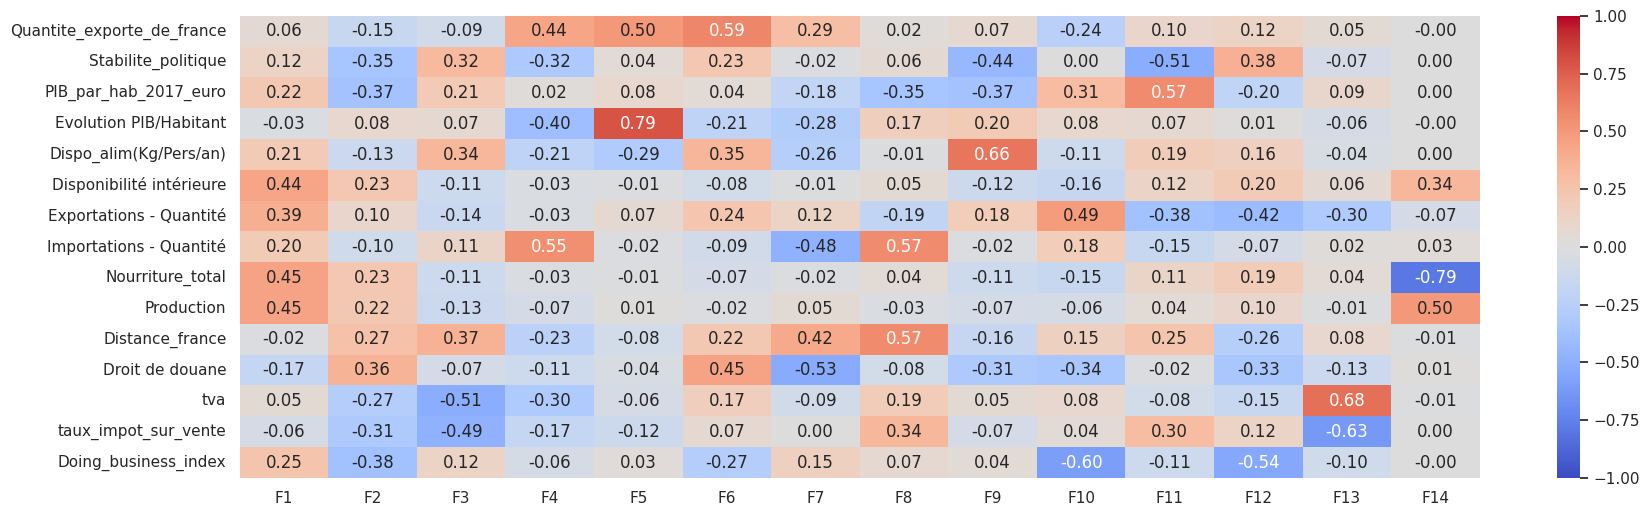

In [822]:
# Affichage du heatmap des correlations
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcst, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

Fonction permettant de tracer les cercles de correlation

In [823]:
def correlation_graph(pca,
                      x_y,
                      features) :# code repris du cours d'Openclassroom
    """Affiche le graphe des correlations

    Positional arguments :
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante :
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0,
                pca.components_[x, i],
                pca.components_[y, i],
                head_width=0.02,
                head_length=0.02,
                width=0.01, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.01,
                pca.components_[y, i] + 0.01,
                features[i], fontsize=8)

    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [824]:
#projetion des données sur les axes principaux de l'ACP
X_proj = pca.transform(X_scaled)
#X_proj[:5]

Fonction permettant d'afficher les plans factoriels

In [825]:
def display_factorial_planes(   X_projected,
                                x_y,
                                pca=None,
                                labels = None,
                                clusters=None,
                                alpha=1,
                                figsize=[10,8],
                                marker="." ):# code repris d'openclassroom
    """
    Affiche la projection des individus

    Positional arguments :
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments :
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8]
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize:
        figsize = (7,6)

    # On gère les labels
    if  labels is None :
        labels = []
    try :
        len(labels)
    except Exception as e :
        raise e

    # On vérifie la variable axis
    if not len(x_y) ==2 :
        raise AttributeError("2 axes sont demandées")
    if max(x_y )>= X_.shape[1] :
        raise AttributeError("la variable axis n'est pas bonne")

    # on définit x et y
    x, y = x_y

    # Initialisation de la figure
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters

    # Les points
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha,
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe
    if pca :
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else :
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) :
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



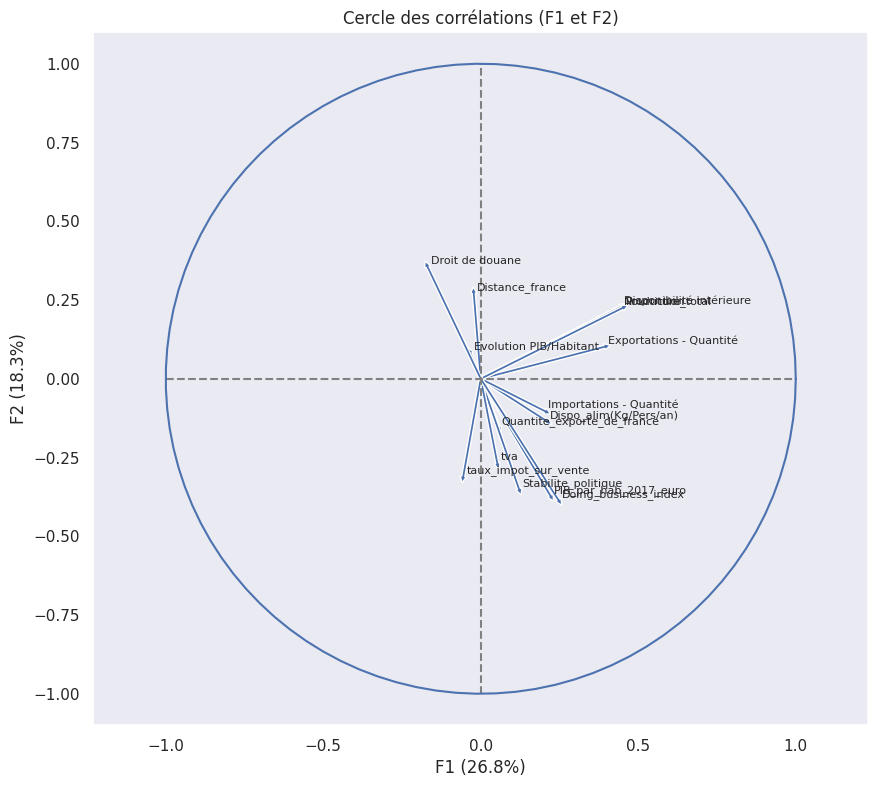

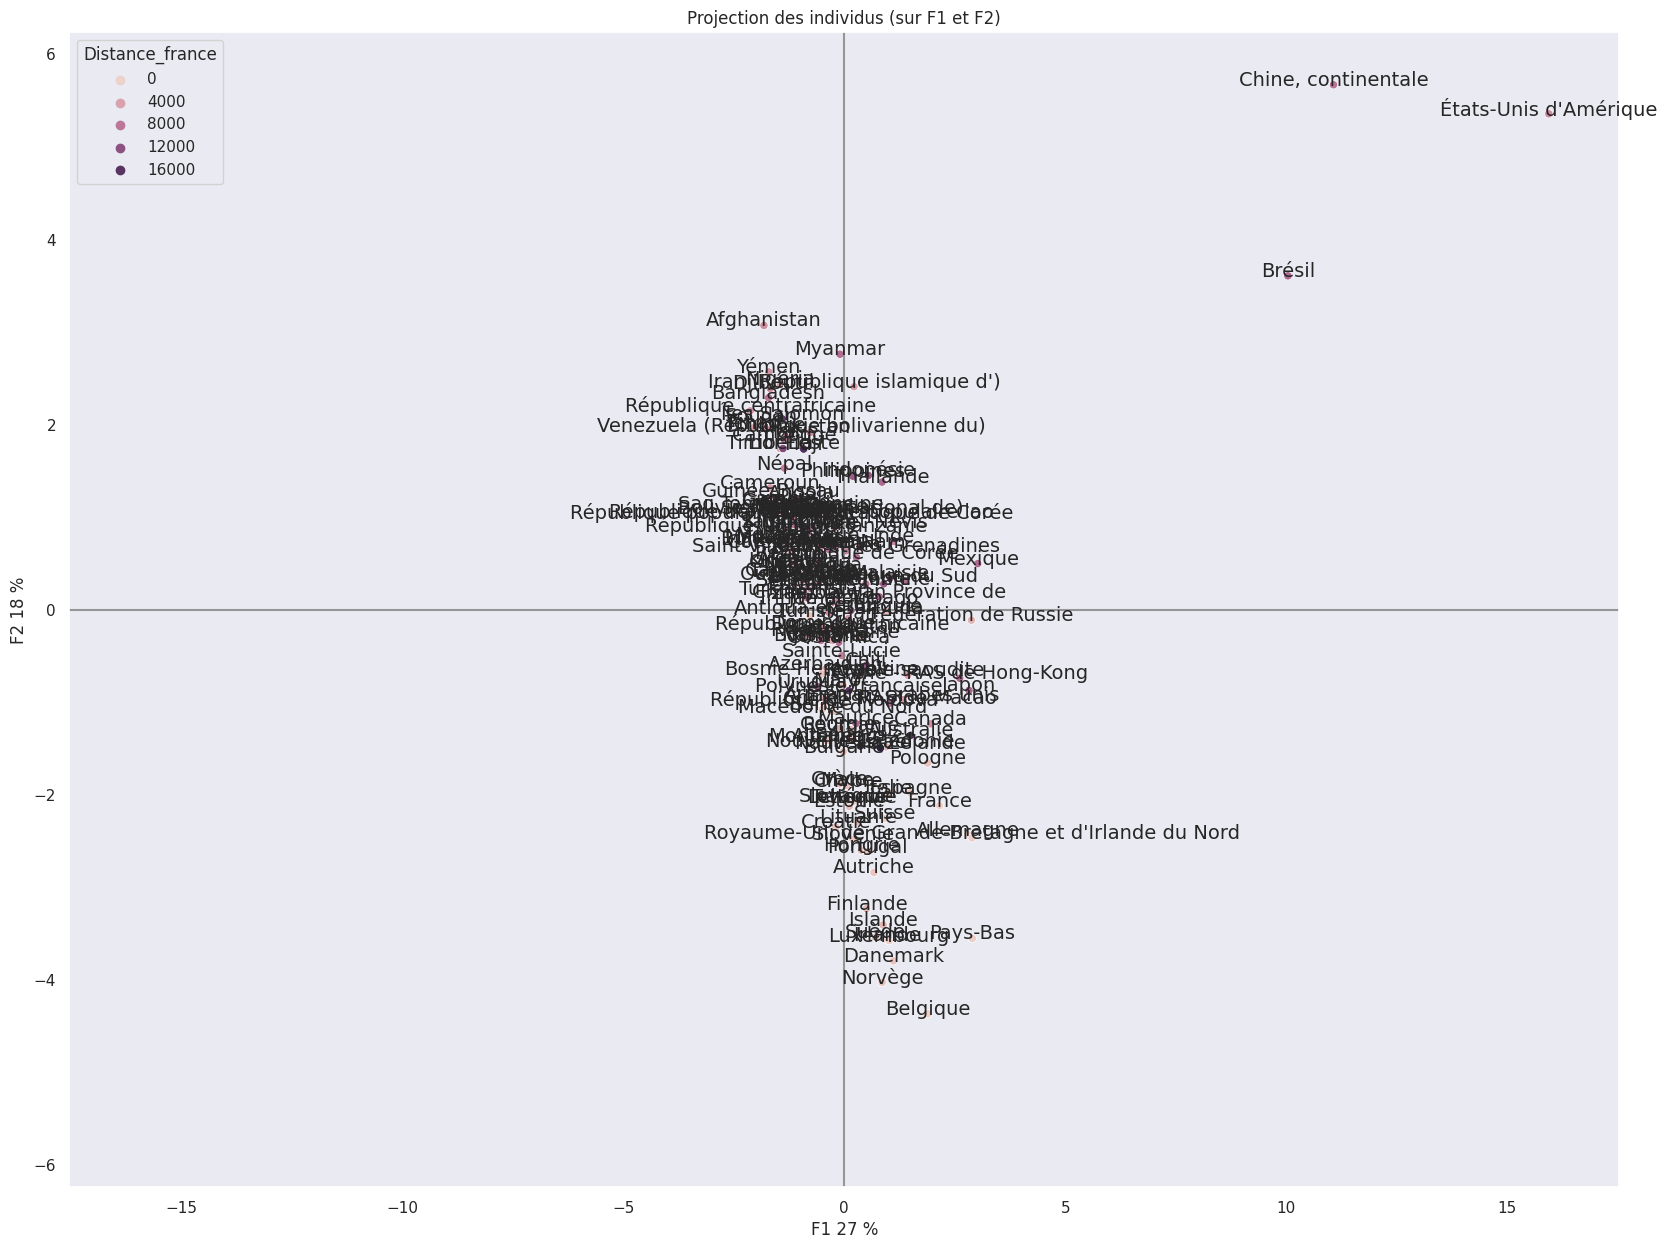

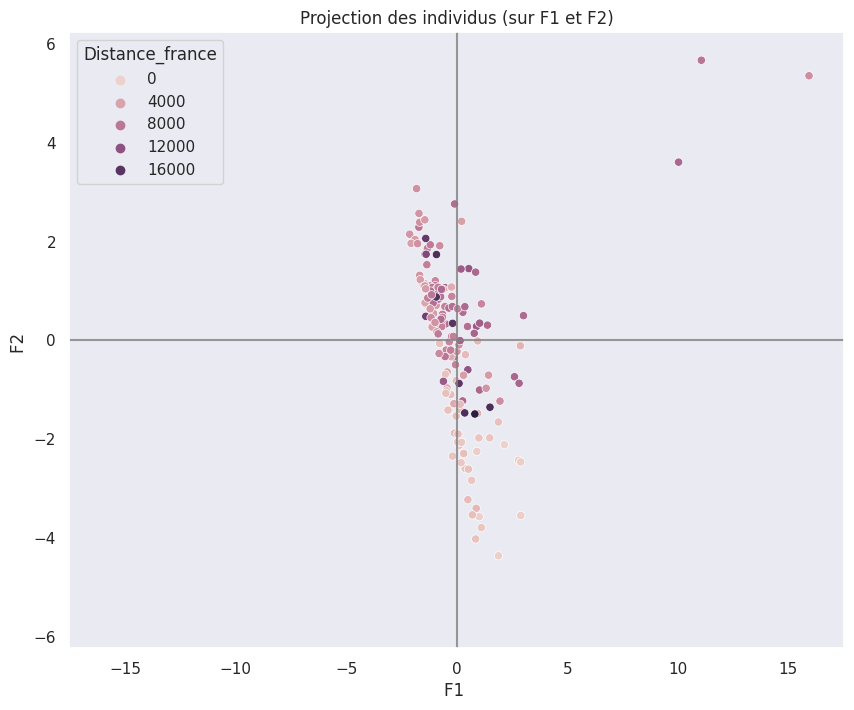

In [826]:
x_y = [0,1] #F1 et F2
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'], marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


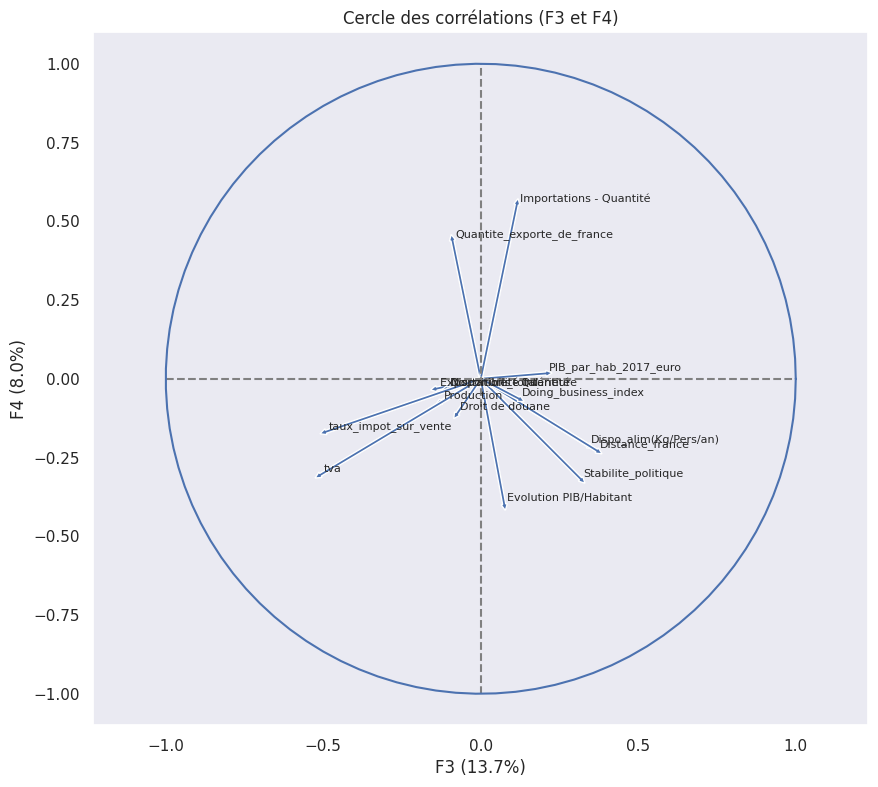

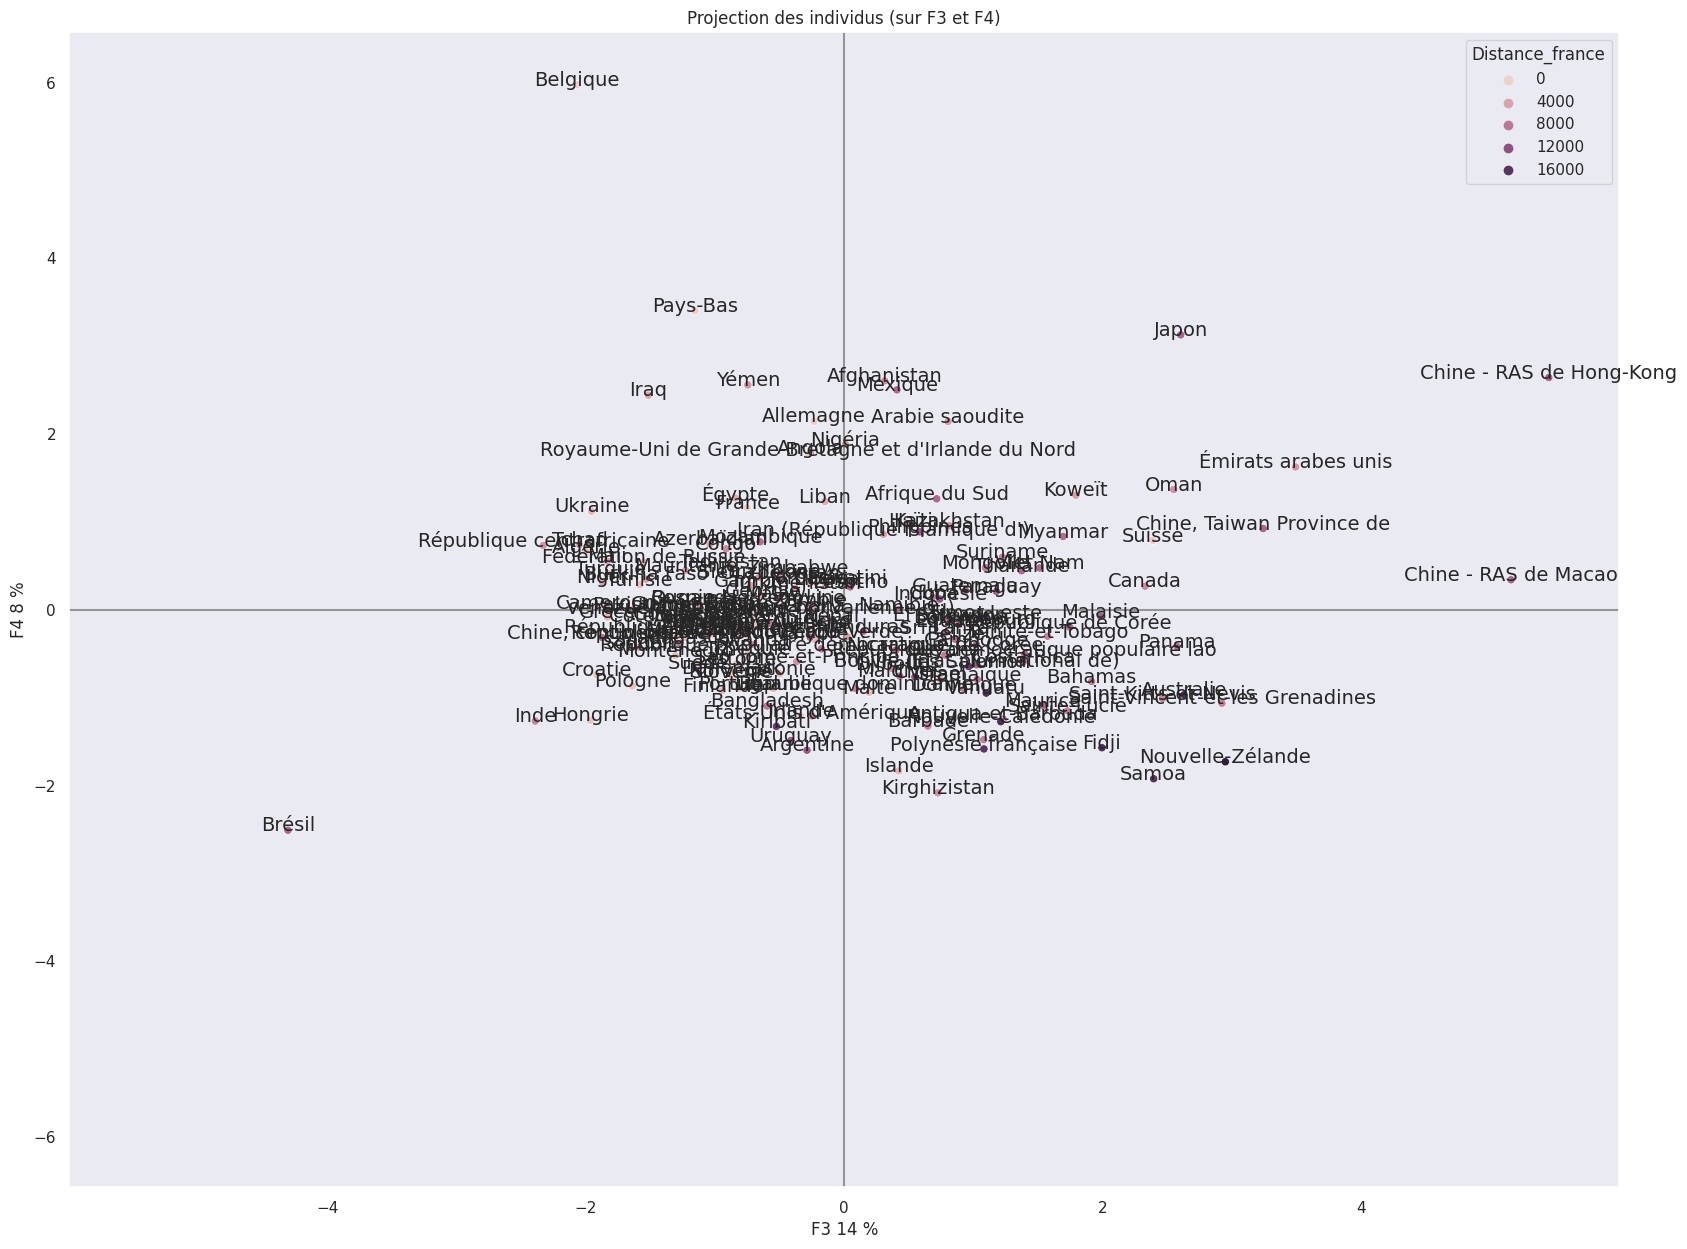

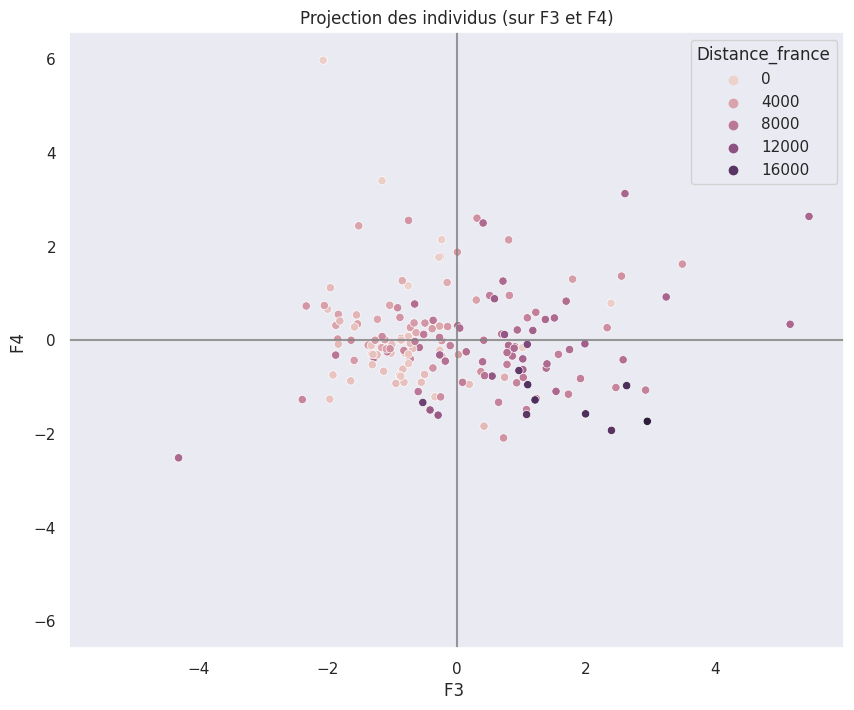

In [827]:
x_y = 2,3 #F3 et F4
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


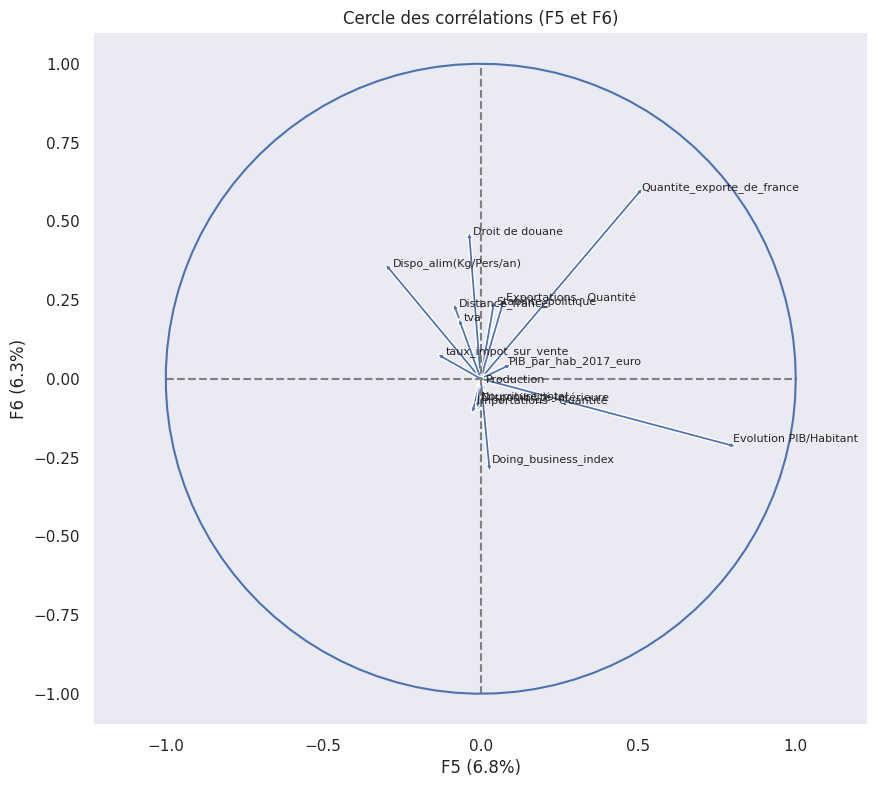

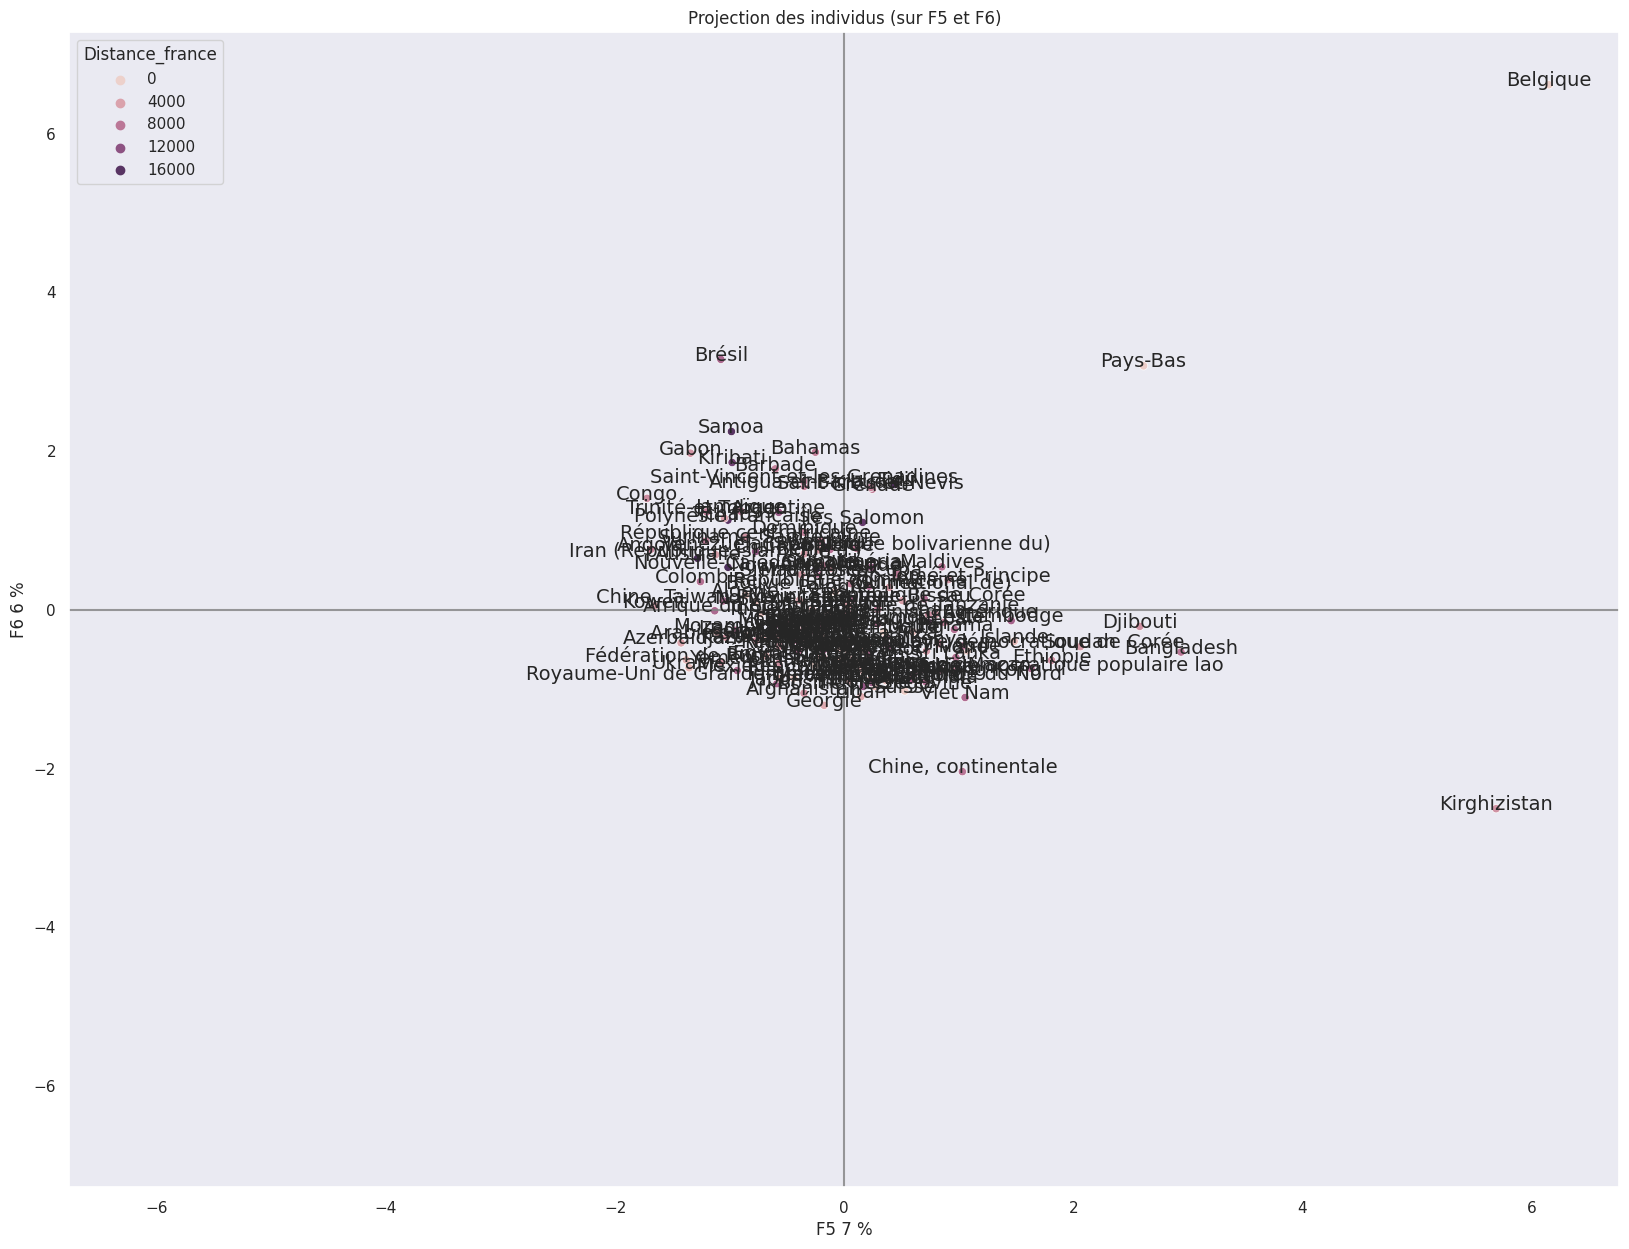

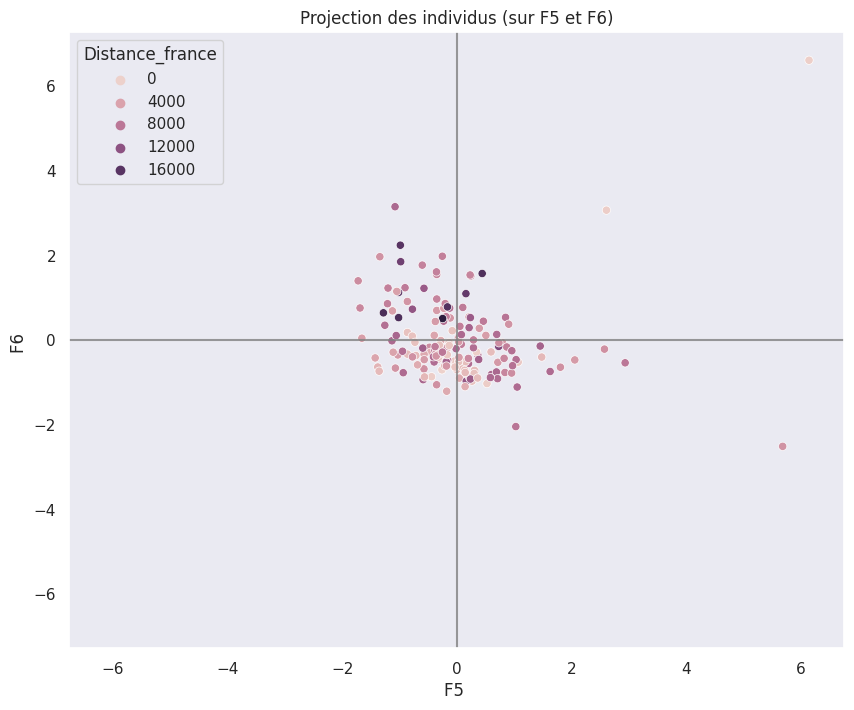

In [828]:
x_y = (4,5) # on veut le cercle de correlation entre F5 et F6
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])


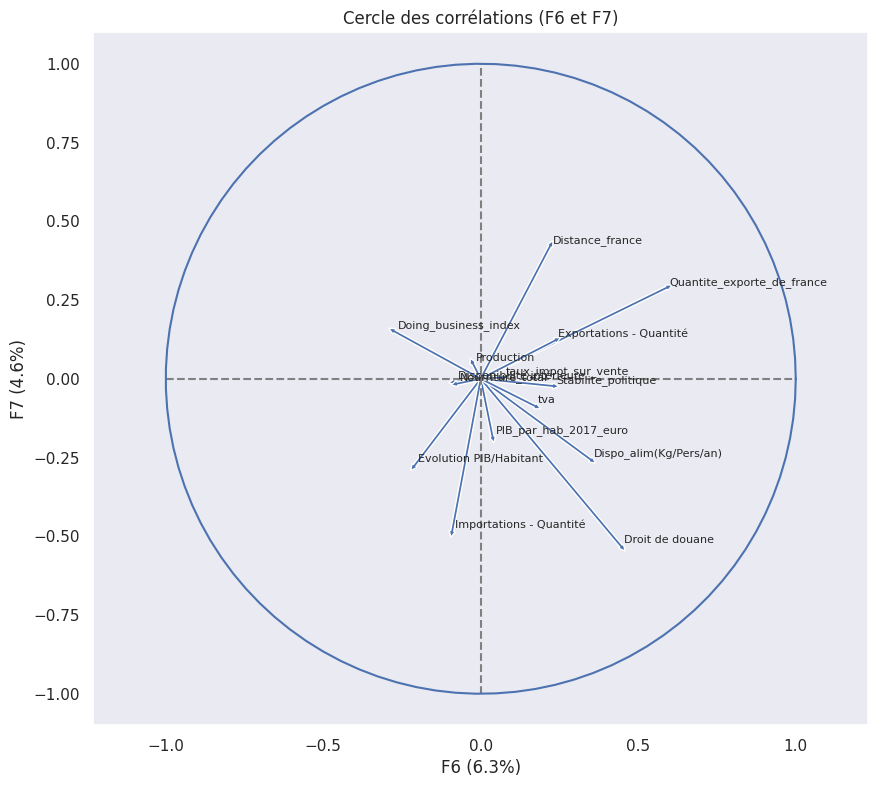

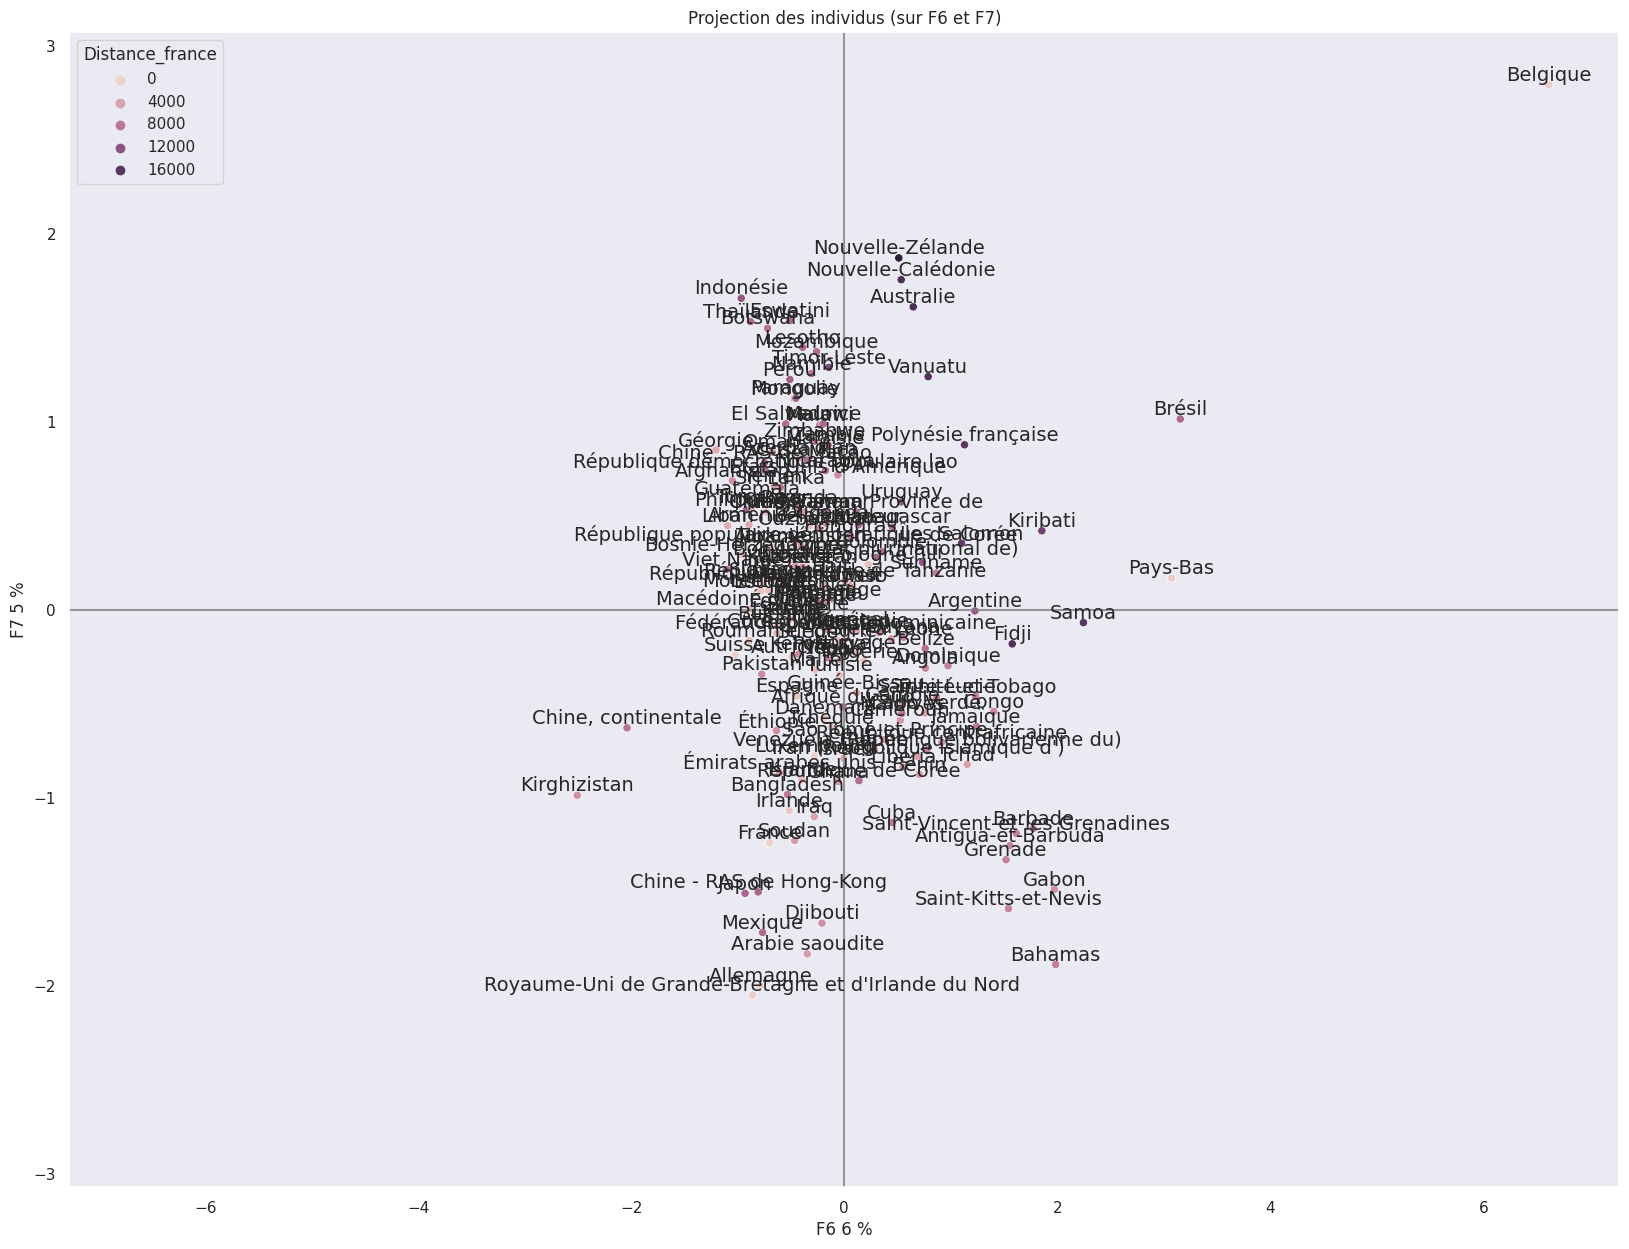

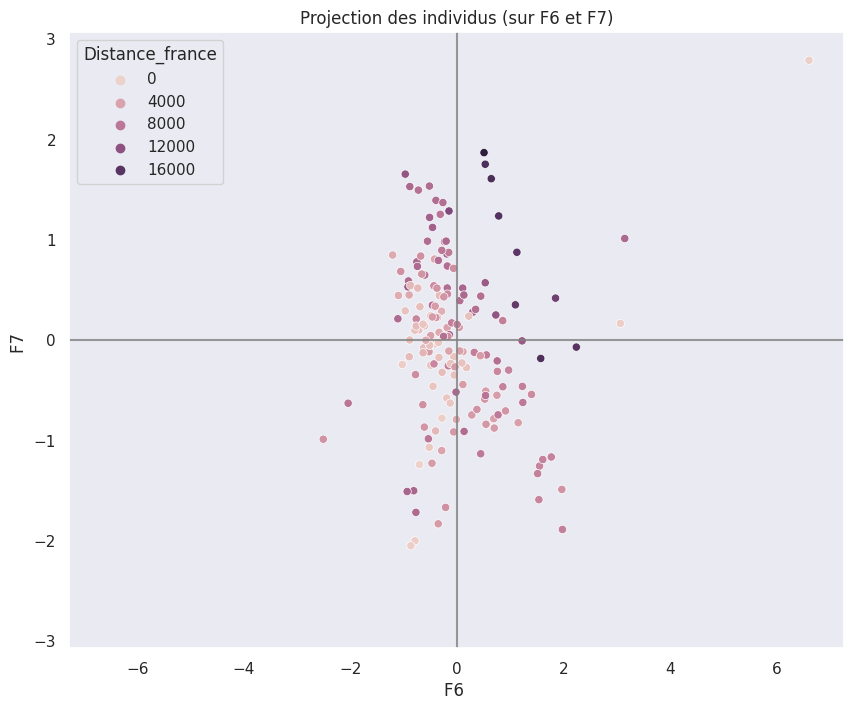

In [829]:
x_y = (5,6) # on veut le cercle de correlation entre F6 et F7
correlation_graph(pca, x_y, features)
display_factorial_planes(X_proj, x_y, pca, labels=names, figsize=(20,15), clusters=df['Distance_france'],marker="o")
display_factorial_planes(X_proj, x_y, clusters=df['Distance_france'])

Identification des axes principaux d'inertie:
* F1 représente la disponibilité alimentaire des pays -> quantité d'aliment disponible pour la consommation d'un pays)
* F2 représente la difficulté de faire du business avec la france
* F3 représente le protectionnisme des pays
* F4 représente la par de la france dans les importations des pays
* F5 représente le niveau de développement des pays
* F6 représente le niveau de relation commerciale avec la france
* F7 représente la relation entre l'éloignement des pays  avec la France et ses importations


**Qu’est ce que l’on veut pour exporter nos Poulet en se basant sur ce que représentent les axes principaux d’inertie ?**
-	Des pays qui ont une bonne disponibilité alimentaire c’est-à-dire une quantité d’aliment disponible pour la consommation humaine élevée
-	Des pays avec lesquels il est facile de faire du business
-	Des pays ayant une étant faiblement protectionniste
-	Des pays qui importe beaucoup de france
- Des pays qui un bon niveau de développement
-	Des pays qui ont de bonne relation commerciale avec la France
-	Des pays qui sont proche de France



In [830]:
#affichage des composantes principales par pays
df_compo = pd.DataFrame(X_proj, index=df.index, columns=["F" + str(i+1) for i in range(14)]).iloc[:, :7]
df_compo_tot = pd.DataFrame(X_proj, index=df.index, columns=["F" + str(i+1) for i in range(14)]).iloc[:, :14]
df_compo.head()

,F1,F2,F3,F4,F5,F6,F7
Zone,,,,,,,
Afghanistan,-1.82,3.07,0.31,2.61,-0.35,-1.05,0.69
Afrique du Sud,1.39,0.31,0.72,1.26,-1.13,-0.01,-0.52
Albanie,-0.35,-1.41,-1.02,-0.28,0.00,-0.69,0.33
Algérie,-1.21,0.51,-2.00,0.66,-0.86,0.18,-0.27
Allemagne,2.79,-2.43,-0.23,2.15,0.16,-0.78,-2.00


In [831]:
# Obtenir les noms des pays satisfaisant les conditions désirées
noms_pays = df_compo.query('F1>0 & F2<0 & F3>0 & F4>0').index.tolist()
# Imprimer les noms des pays
print(noms_pays)
print(len(noms_pays))

['Arabie saoudite', 'Canada', 'Chine - RAS de Hong-Kong', 'Chine - RAS de Macao', 'Japon', 'Kazakhstan', 'Koweït', 'Oman', 'Suisse', 'Émirats arabes unis']
10


# Kmeans sur le fichier de base table_fus

In [891]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7)

on test d'abord avec 7 clusters et on va travailer sur une copy appelé X de df

In [892]:
X = df.copy()

In [893]:
#on entraine le model
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=7)

In [894]:
#on peut calculer son inertie (somme des carrés des distances entre chaque point)
kmeans.inertia_

2.707048542711695e+19

l'inertie étant très élevés, il semble que les points au point de chaque cluster sont dispersés sur de grande distances par rapport à leur centree

Evaluation du nombre de cluster par la méthode du coude

In [895]:
#on creer une liste vide pour enregistrer les inerties
inertia = []

In [896]:
# k_list : notre liste du nombre de cluster
k_list = range(1, 11)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [897]:
#pour chaque nombre de cluster, on instancie un k_means pour k clusters puis on entraine le model et on enregistre l'inertie obtenue dans inertia
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inertia.append(kmeans.inertia_)
  centroids  = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [898]:
inertia

[2.6705146286160237e+21,
 4.081357756117188e+20,
 2.0723244765656872e+20,
 9.525360865621231e+19,
 5.021388746427708e+19,
 3.8366322463121015e+19,
 2.707048542711695e+19,
 2.157686097811001e+19,
 1.8563043439325237e+19,
 1.684387750000398e+19]

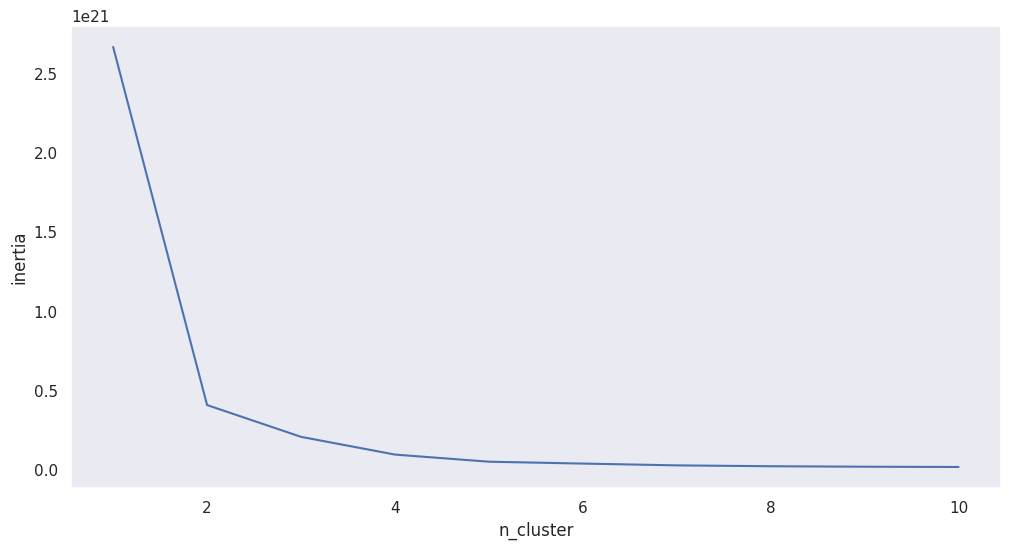

In [899]:
# affichage du graphique des inerties pour constater la cassure de la courbe
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("inertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, inertia)

In [900]:
#print("Dimensions des données:", X.shape)
#print("Dimensions des centroids:", centroids.shape)

La méthode du coude semble indiquer qu'il faut prendre 2 clusters. Vérifions cette indication par une autre méthode

In [901]:
#utilisation de la librairie kneed pour calculer le nombre de cluster

from kneed import KneeLocator

kl = KneeLocator(range(1, 11), inertia, curve="convex", direction="decreasing")

print(f'Nombre de cluster : {kl.elbow}')


Nombre de cluster : 2


L'utilisation de la librairie kneed qui permet d'identifier le point de coude d'une ligne ajustée aux données indique un nombre de cluster de 2

Evaluation du nombre de cluster par la méthode de la silhouette

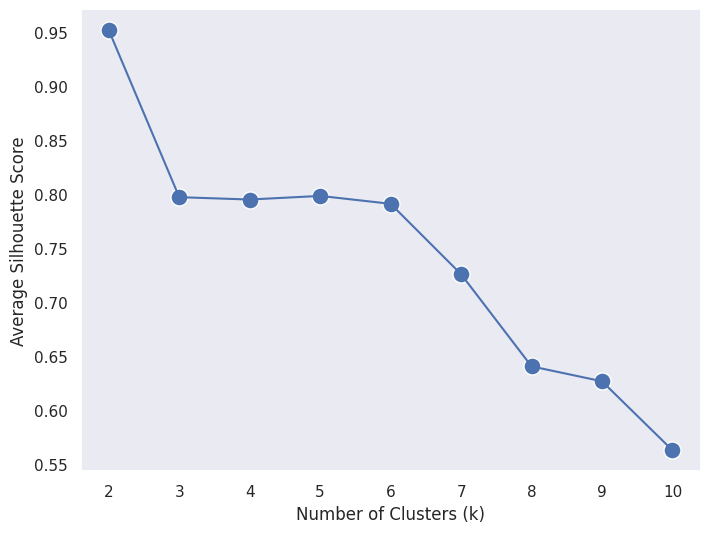

In [902]:
#The Average Silhouette Score
from sklearn.metrics import silhouette_score

silhouette = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=25, random_state=1234)
    km.fit(X)
    silhouette.append(silhouette_score(X, km.labels_))

silhouette_series = pd.Series(silhouette, index=range(2, 11))

plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_series, x=silhouette_series.index)
ax = sns.scatterplot(y=silhouette_series, x=silhouette_series.index, s=150)
ax = ax.set(xlabel='Number of Clusters (k)', ylabel='Average Silhouette Score')

plt.show()

In [903]:
silhouette_series

2    0.95
3    0.80
4    0.80
5    0.80
6    0.79
7    0.73
8    0.64
9    0.63
10   0.56
dtype: float64

La méthode de la silhouette confirme qu'il faut prendre 2 clusters car pour k=2, on a le score silhouette le plus élevé.

Les 3 méthodes s'accordent à dire qu'il faut prendre 2 clusters mais afin d'un peut mieux cibler nos pays, nous allons en prendre 5

In [904]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
inertia.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [905]:
kmeans.labels_

array([0, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 4, 0, 0], dtype=int32)

In [906]:
centroids

array([[ 7.28789286e+05, -3.78571429e-03,  1.24125678e+04,
         7.65881282e+00,  1.89065714e+01,  1.24764286e+08,
         3.00071429e+07,  5.22714286e+07,  1.20435714e+08,
         1.08878571e+08,  5.93509793e+03,  6.24935714e+00,
         1.58917857e+01,  1.58067857e+01,  6.27425714e+01],
       [ 0.00000000e+00, -4.20000000e-01,  9.30291000e+03,
        -1.97184748e+01,  4.80300000e+01,  9.98200000e+09,
         4.22300000e+09,  3.00000000e+06,  9.98200000e+09,
         1.42010000e+10,  9.40840600e+03,  8.01000000e+00,
         3.50000000e+01,  1.70000000e+01,  5.91000000e+01],
       [ 1.43792692e+05, -2.88846154e-01,  1.71272392e+04,
        -2.63138878e+00,  2.49238462e+01,  1.56073077e+09,
         1.93269231e+08,  2.35615385e+08,  1.45019231e+09,
         1.57692308e+09,  6.46440165e+03,  4.42423077e+00,
         1.50384615e+01,  1.51153846e+01,  7.16650000e+01],
       [ 1.04333333e+03, -7.06666667e-01,  6.92864000e+03,
        -1.00669246e+00,  2.19066667e+01,  4.14533333

In [907]:
X["cluster"] = kmeans.labels_
X

,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evolution PIB/Habitant,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index,cluster
Zone,,,,,,,,,,,,,,,,
Afghanistan,0.00,-2.80,498.34,-20.05,1.53,57000000.00,0.00,29000000.00,55000000.00,28000000.00,5590.38,7.02,0.00,10.00,44.06,0
Afrique du Sud,0.00,-0.28,6330.41,-17.61,35.69,2118000000.00,63000000.00,514000000.00,2035000000.00,1667000000.00,9353.55,4.51,15.00,15.00,67.02,2
Albanie,440.00,0.38,4259.17,6.67,16.36,47000000.00,0.00,38000000.00,47000000.00,13000000.00,1603.53,0.85,20.00,20.00,67.75,0
Algérie,51470.00,-0.92,3886.84,-26.30,6.38,277000000.00,0.00,2000000.00,264000000.00,275000000.00,1340.39,8.85,19.00,19.00,48.60,0
Allemagne,1313490.00,0.59,41973.43,1.82,19.47,1739000000.00,646000000.00,842000000.00,1609000000.00,1514000000.00,439.90,1.79,19.00,19.00,79.71,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,0.00,0.62,40480.13,-2.98,43.47,412000000.00,94000000.00,433000000.00,412000000.00,48000000.00,5249.53,2.82,5.00,5.00,80.75,0
Équateur,0.00,-0.07,5871.62,10.00,19.31,341000000.00,0.00,0.00,324000000.00,340000000.00,9367.10,6.81,12.00,12.00,57.72,0
États-Unis d'Amérique,0.00,0.34,56313.29,15.69,55.68,18266000000.00,3692000000.00,123000000.00,18100000000.00,21914000000.00,5838.16,1.66,10.50,0.00,83.70,4


In [908]:
def Affichage_cluster(tab):
    for i in range(5):
        cluster = tab[tab['cluster'] == i].index
        print(f"Cluster '{i}' data:")
        print(cluster)
        nb = (tab['cluster'] == i).sum()
        print(f"Nombre d'éléments dans le cluster '{i}': {nb}\n")
        print('______________________________________________________________')


In [909]:
Affichage_cluster(X)

Cluster '0' data:
Index(['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Antigua-et-Barbuda',
       'Arménie', 'Autriche', 'Azerbaïdjan', 'Bahamas', 'Bangladesh',
       ...
       'Uruguay', 'Vanuatu', 'Venezuela (République bolivarienne du)', 'Yémen',
       'Zambie', 'Zimbabwe', 'Émirats arabes unis', 'Équateur', 'Éthiopie',
       'Îles Salomon'],
      dtype='object', name='Zone', length=140)
Nombre d'éléments dans le cluster '0': 140

______________________________________________________________
Cluster '1' data:
Index(['Brésil'], dtype='object', name='Zone')
Nombre d'éléments dans le cluster '1': 1

______________________________________________________________
Cluster '2' data:
Index(['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Argentine',
       'Australie', 'Canada', 'Colombie', 'Espagne', 'France', 'Indonésie',
       'Iran (République islamique d')', 'Italie', 'Japon', 'Malaisie',
       'Myanmar', 'Pakistan', 'Philippines', 'Pologne', 'Pérou',
       'Royaume-Uni 

In [910]:
def Affichage_boxplot(tab,c) :
  plt.figure(figsize=(20, 15))
  sns.set(style="dark")

  for i in range(c):
      plt.subplot(6, 3, i+1)
      sns.boxplot(data=tab, x='cluster', y=tab[tab.columns[i]])

  plt.show()


In [946]:
#détermination des centroides
#def Affichage_moyenne_cluster(tab):
#    pd.options.display.float_format = '{:.2f}'.format
#    pivot = tab.pivot_table(index='cluster', aggfunc='mean')
#    print(pivot)

In [913]:
#détermination des centroides
X.groupby('cluster').mean()

,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evolution PIB/Habitant,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index
cluster,,,,,,,,,,,,,,,
0,728789.29,-0.00,12412.57,7.66,18.91,124764285.71,30007142.86,52271428.57,120435714.29,108878571.43,5935.10,6.25,15.89,15.81,62.74
1,0.00,-0.42,9302.91,-19.72,48.03,9982000000.00,4223000000.00,3000000.00,9982000000.00,14201000000.00,9408.41,8.01,35.00,17.00,59.10
2,143792.69,-0.29,17127.24,-2.63,24.92,1560730769.23,193269230.77,235615384.62,1450192307.69,1576923076.92,6464.40,4.42,15.04,15.12,71.66
3,1043.33,-0.71,6928.64,-1.01,21.91,4145333333.33,42666666.67,399333333.33,3844000000.00,3746000000.00,6098.45,4.77,21.33,18.00,73.87
4,0.00,0.06,32300.65,27.81,34.01,18213500000.00,2134000000.00,287500000.00,17809000000.00,20075000000.00,7031.69,4.58,11.75,6.50,80.80


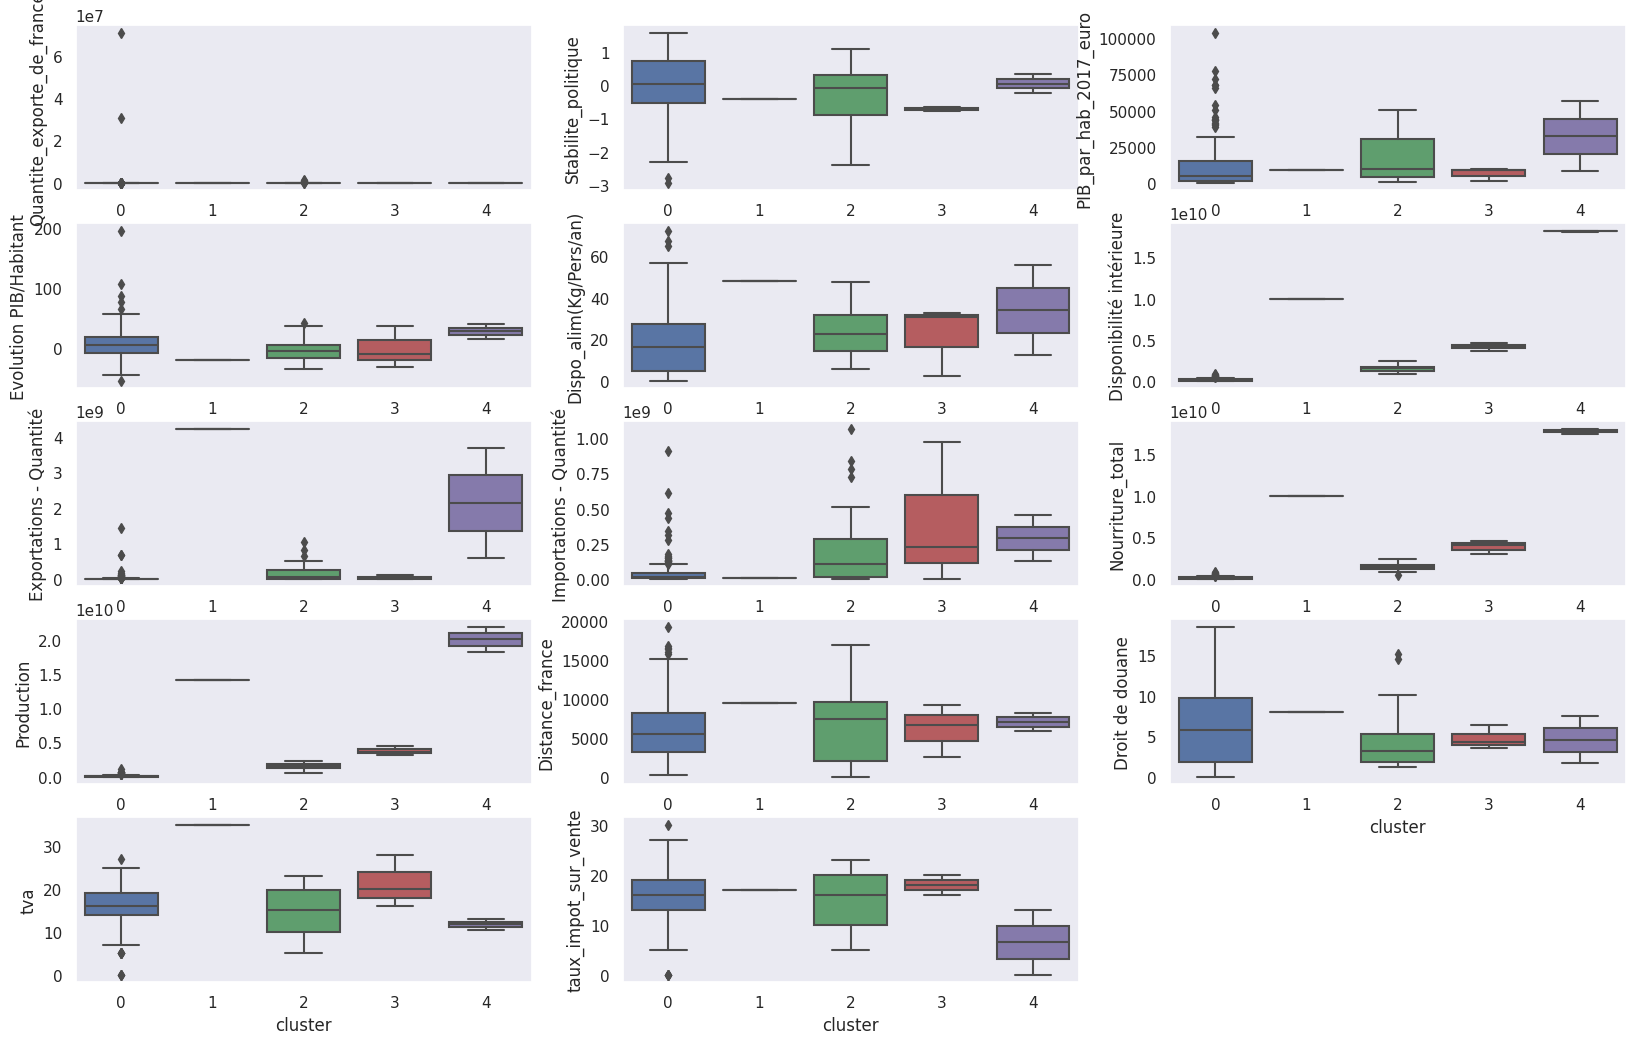

In [914]:
#représentation des clusters
Affichage_boxplot(X,14)

Détermination des centroides

In [915]:
#sns.pairplot(X, hue='cluster', palette='viridis')

# Kmeans sur les données résultantes du PCA

In [916]:
Xpca=df_compo_tot


In [917]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(Xpca)
inertia.append(kmeans.inertia_)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [918]:
Xpca["cluster"] = kmeans.labels_

In [919]:
Xpca.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,cluster
Zone,,,,,,,,,,,,,,,
Afghanistan,-1.82,3.07,0.31,2.61,-0.35,-1.05,0.69,-1.37,0.48,0.34,1.00,-0.13,-0.97,0.02,0
Afrique du Sud,1.39,0.31,0.72,1.26,-1.13,-0.01,-0.52,1.78,0.45,-0.02,0.05,0.10,0.18,-0.02,3
Albanie,-0.35,-1.41,-1.02,-0.28,0.00,-0.69,0.33,-0.03,0.40,0.03,-0.65,0.75,-0.00,-0.01,1
Algérie,-1.21,0.51,-2.00,0.66,-0.86,0.18,-0.27,-0.78,-0.25,0.13,0.01,0.36,0.10,0.00,0
Allemagne,2.79,-2.43,-0.23,2.15,0.16,-0.78,-2.00,1.25,-0.42,1.10,-0.70,-0.55,-0.23,0.02,1


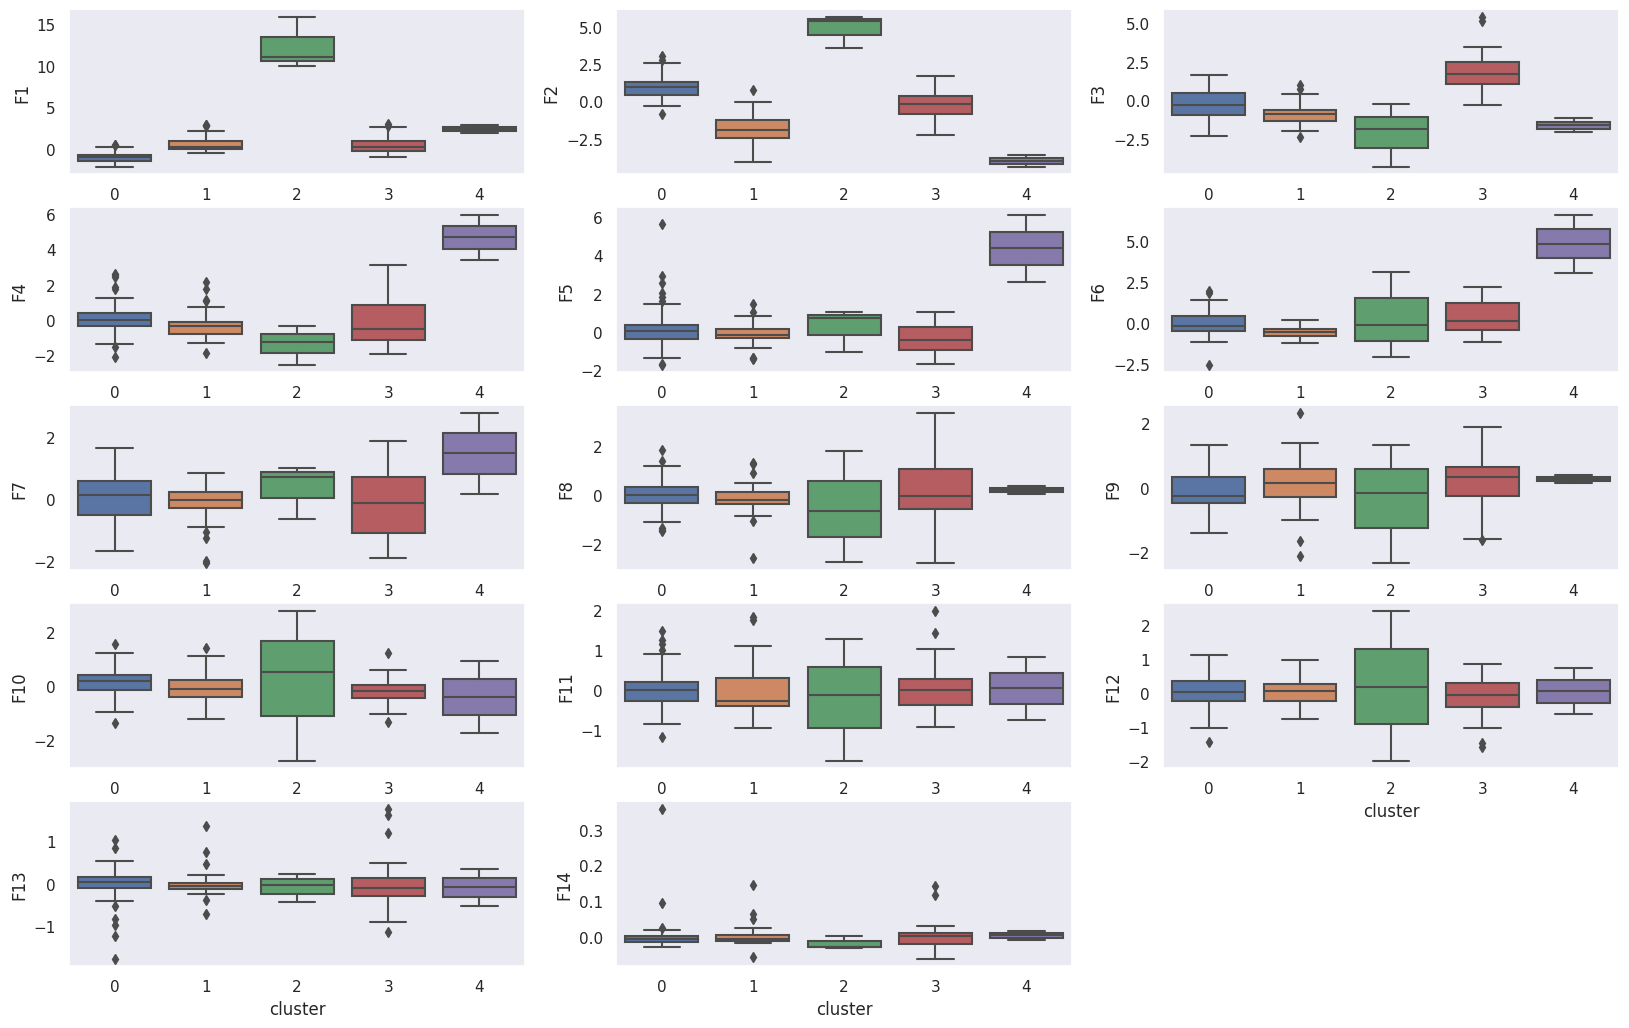

In [920]:
Affichage_boxplot(Xpca,14)

In [921]:
Affichage_cluster(Xpca)

Cluster '0' data:
Index(['Afghanistan', 'Algérie', 'Angola', 'Bangladesh', 'Belize',
       'Bolivie (État plurinational de)', 'Botswana', 'Burkina Faso', 'Bénin',
       'Cabo Verde', 'Cambodge', 'Cameroun', 'Colombie', 'Congo', 'Cuba',
       'Côte d'Ivoire', 'Djibouti', 'El Salvador', 'Eswatini', 'Gabon',
       'Gambie', 'Ghana', 'Guatemala', 'Guinée', 'Guinée-Bissau', 'Guyana',
       'Haïti', 'Honduras', 'Indonésie', 'Iran (République islamique d')',
       'Iraq', 'Jordanie', 'Kenya', 'Kirghizistan', 'Kiribati', 'Lesotho',
       'Liban', 'Libéria', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Mauritanie', 'Mongolie', 'Mozambique', 'Myanmar', 'Namibie',
       'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan',
       'Pakistan', 'Paraguay', 'Philippines', 'Pérou', 'Rwanda',
       'République centrafricaine', 'République dominicaine',
       'République démocratique populaire lao',
       'République populaire démocratique de Corée',
       'République-Un

In [922]:
Xpca.groupby('cluster').mean()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
cluster,,,,,,,,,,,,,,
0,-1.01,0.98,-0.28,0.12,0.10,-0.02,0.10,0.01,-0.13,0.13,0.00,0.03,0.01,-0.00
1,0.54,-1.88,-0.88,-0.27,-0.11,-0.51,-0.14,-0.16,0.14,-0.08,-0.02,0.04,0.00,0.00
2,12.35,4.88,-2.14,-1.34,0.23,0.35,0.37,-0.54,-0.39,0.19,-0.21,0.21,-0.07,-0.02
3,0.53,-0.20,1.89,-0.10,-0.33,0.36,-0.17,0.20,0.15,-0.19,0.04,-0.13,-0.00,0.00
4,2.39,-3.96,-1.61,4.69,4.38,4.84,1.48,0.20,0.27,-0.39,0.04,0.07,-0.08,0.00


## Dendrogramme ou classification ascendante hierarchique selon la methode de ward

# Dendrograme sur le fichier de base table_fus

In [923]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [924]:
X = df
Z = linkage(X, method="ward")

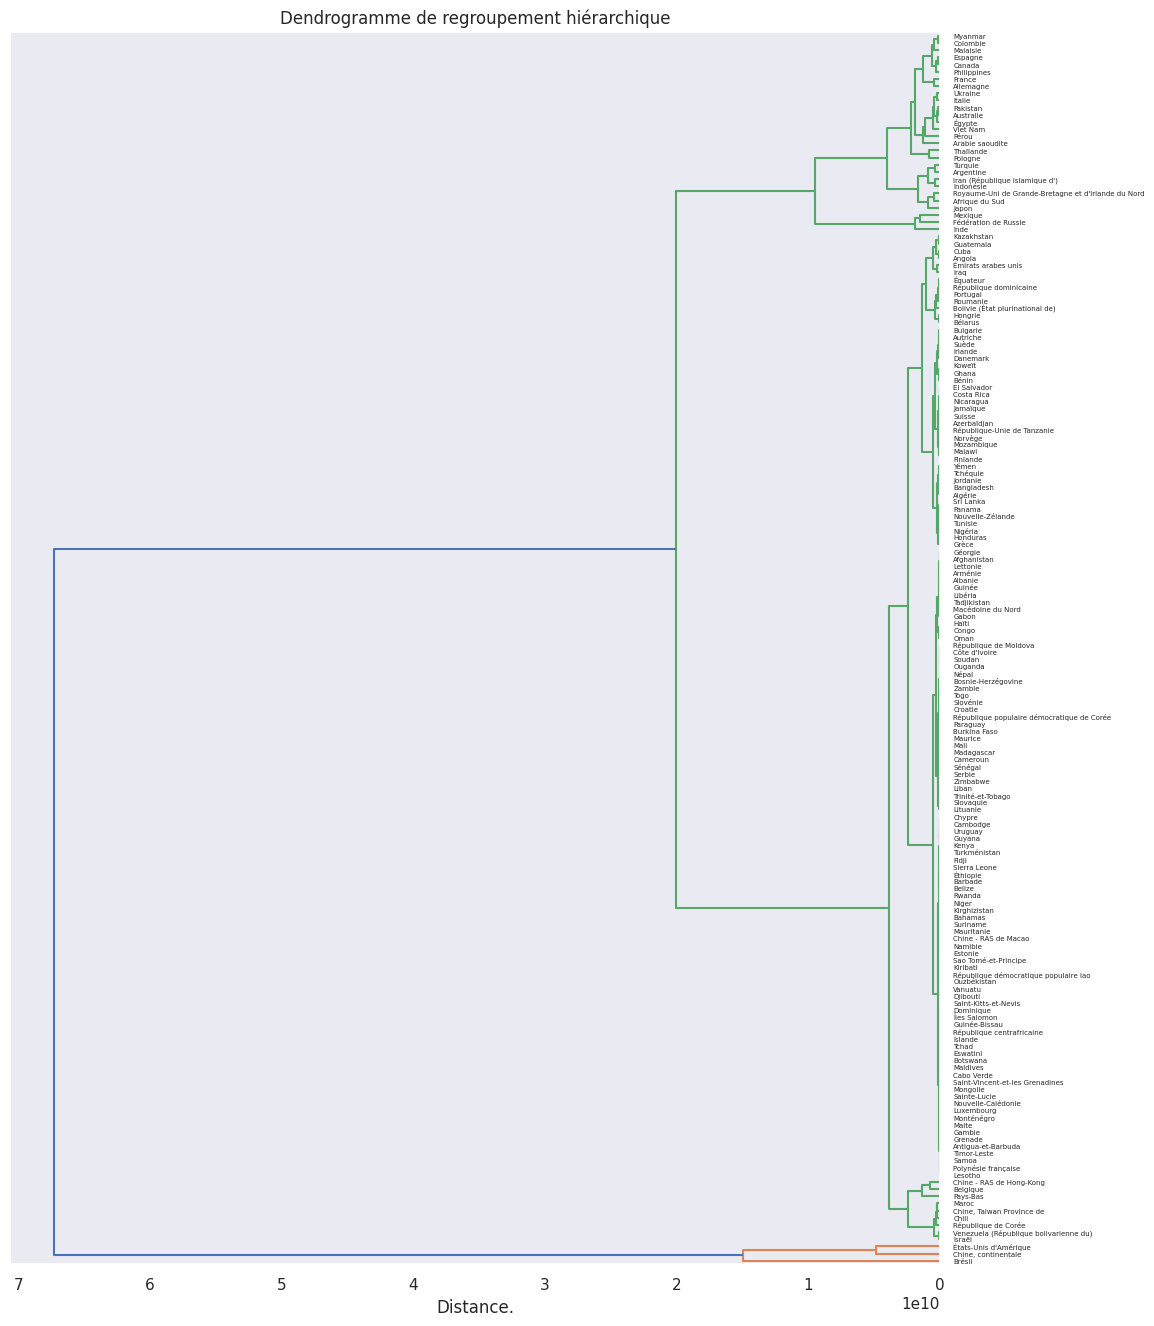

In [925]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left') #truncate_mode="lastp"

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Distance.")
#plt.ylabel("Distance.")
plt.show()

on rend le dendrogramme plus lisible en se limitant à 5 groupes (idem nombre de cluster de kmeans)

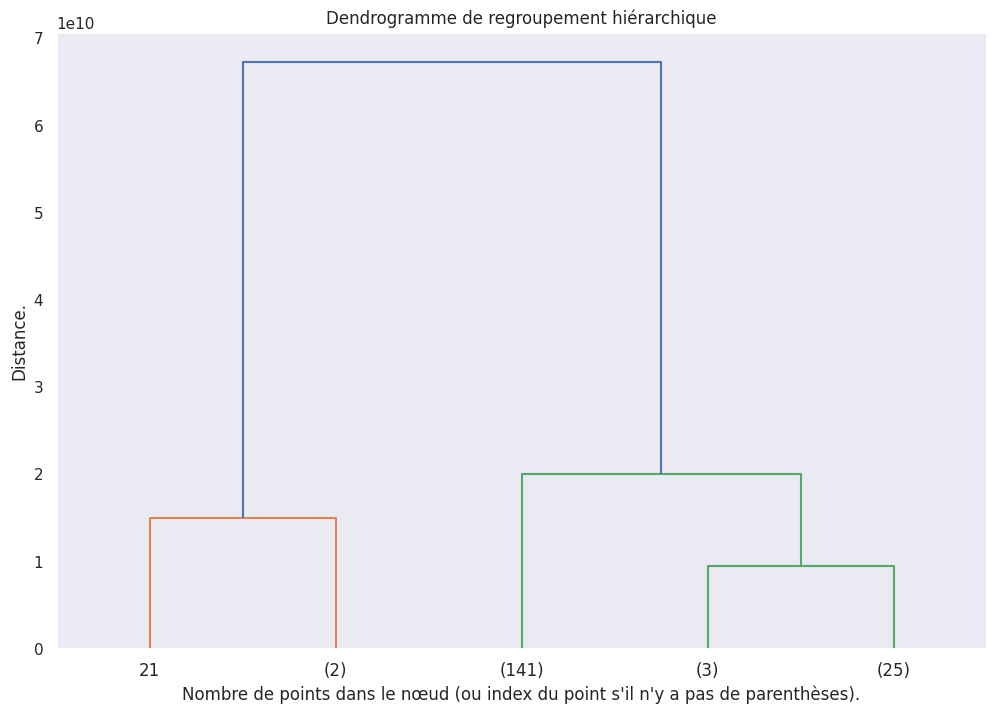

In [926]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp")

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()

Les résultats obtenues sont très cohérents avec ceux du Kmean

In [927]:
#Identification des 5 groupes obtenus
groupes_cah = fcluster(Z, 5, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah)))

#Index trié des groupes
idg = np.argsort(groupes_cah)

#Affichage des pays selon leurs groupes
df_groupes_cah = pd.DataFrame(X.index[idg], groupes_cah[idg]).reset_index()
df_groupes_cah = df_groupes_cah.rename(columns={'index':'cluster'})

Numérotation de nos groupes : [1 2 3 4 5]


In [928]:
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah = pd.merge(X, df_groupes_cah, on='Zone')

In [929]:
df_groupe1_cah = df_groupes_cah[df_groupes_cah['cluster'] == 1]
df_groupe2_cah = df_groupes_cah[df_groupes_cah['cluster'] == 2]
df_groupe3_cah = df_groupes_cah[df_groupes_cah['cluster'] == 3]
df_groupe4_cah = df_groupes_cah[df_groupes_cah['cluster'] == 4]
df_groupe5_cah = df_groupes_cah[df_groupes_cah['cluster'] == 5]

In [930]:
df_groupes_cah.groupby('cluster').mean()

<ipython-input-930-abf239d0b47f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupes_cah.groupby('cluster').mean()


,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evolution PIB/Habitant,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index
cluster,,,,,,,,,,,,,,,
1,0.00,0.06,32300.65,27.81,34.01,18213500000.00,2134000000.00,287500000.00,17809000000.00,20075000000.00,7031.69,4.58,11.75,6.50,80.80
2,0.00,-0.42,9302.91,-19.72,48.03,9982000000.00,4223000000.00,3000000.00,9982000000.00,14201000000.00,9408.41,8.01,35.00,17.00,59.10
3,723620.57,-0.00,12535.31,7.78,18.89,129936170.21,29836879.43,52872340.43,125638297.87,114049645.39,5956.70,6.31,15.85,15.77,62.89
4,1043.33,-0.71,6928.64,-1.01,21.91,4145333333.33,42666666.67,399333333.33,3844000000.00,3746000000.00,6098.45,4.77,21.33,18.00,73.87
5,149544.40,-0.31,16623.54,-3.70,25.25,1589000000.00,200760000.00,239560000.00,1474040000.00,1606480000.00,6363.72,4.02,15.24,15.32,71.17


In [931]:
df_groupes_cah.head()

,Zone,Quantite_exporte_de_france,Stabilite_politique,PIB_par_hab_2017_euro,Evolution PIB/Habitant,Dispo_alim(Kg/Pers/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture_total,Production,Distance_france,Droit de douane,tva,taux_impot_sur_vente,Doing_business_index,cluster
0,Afghanistan,0.00,-2.80,498.34,-20.05,1.53,57000000.00,0.00,29000000.00,55000000.00,28000000.00,5590.38,7.02,0.00,10.00,44.06,3
1,Afrique du Sud,0.00,-0.28,6330.41,-17.61,35.69,2118000000.00,63000000.00,514000000.00,2035000000.00,1667000000.00,9353.55,4.51,15.00,15.00,67.02,5
2,Albanie,440.00,0.38,4259.17,6.67,16.36,47000000.00,0.00,38000000.00,47000000.00,13000000.00,1603.53,0.85,20.00,20.00,67.75,3
3,Algérie,51470.00,-0.92,3886.84,-26.30,6.38,277000000.00,0.00,2000000.00,264000000.00,275000000.00,1340.39,8.85,19.00,19.00,48.60,3
4,Allemagne,1313490.00,0.59,41973.43,1.82,19.47,1739000000.00,646000000.00,842000000.00,1609000000.00,1514000000.00,439.90,1.79,19.00,19.00,79.71,5


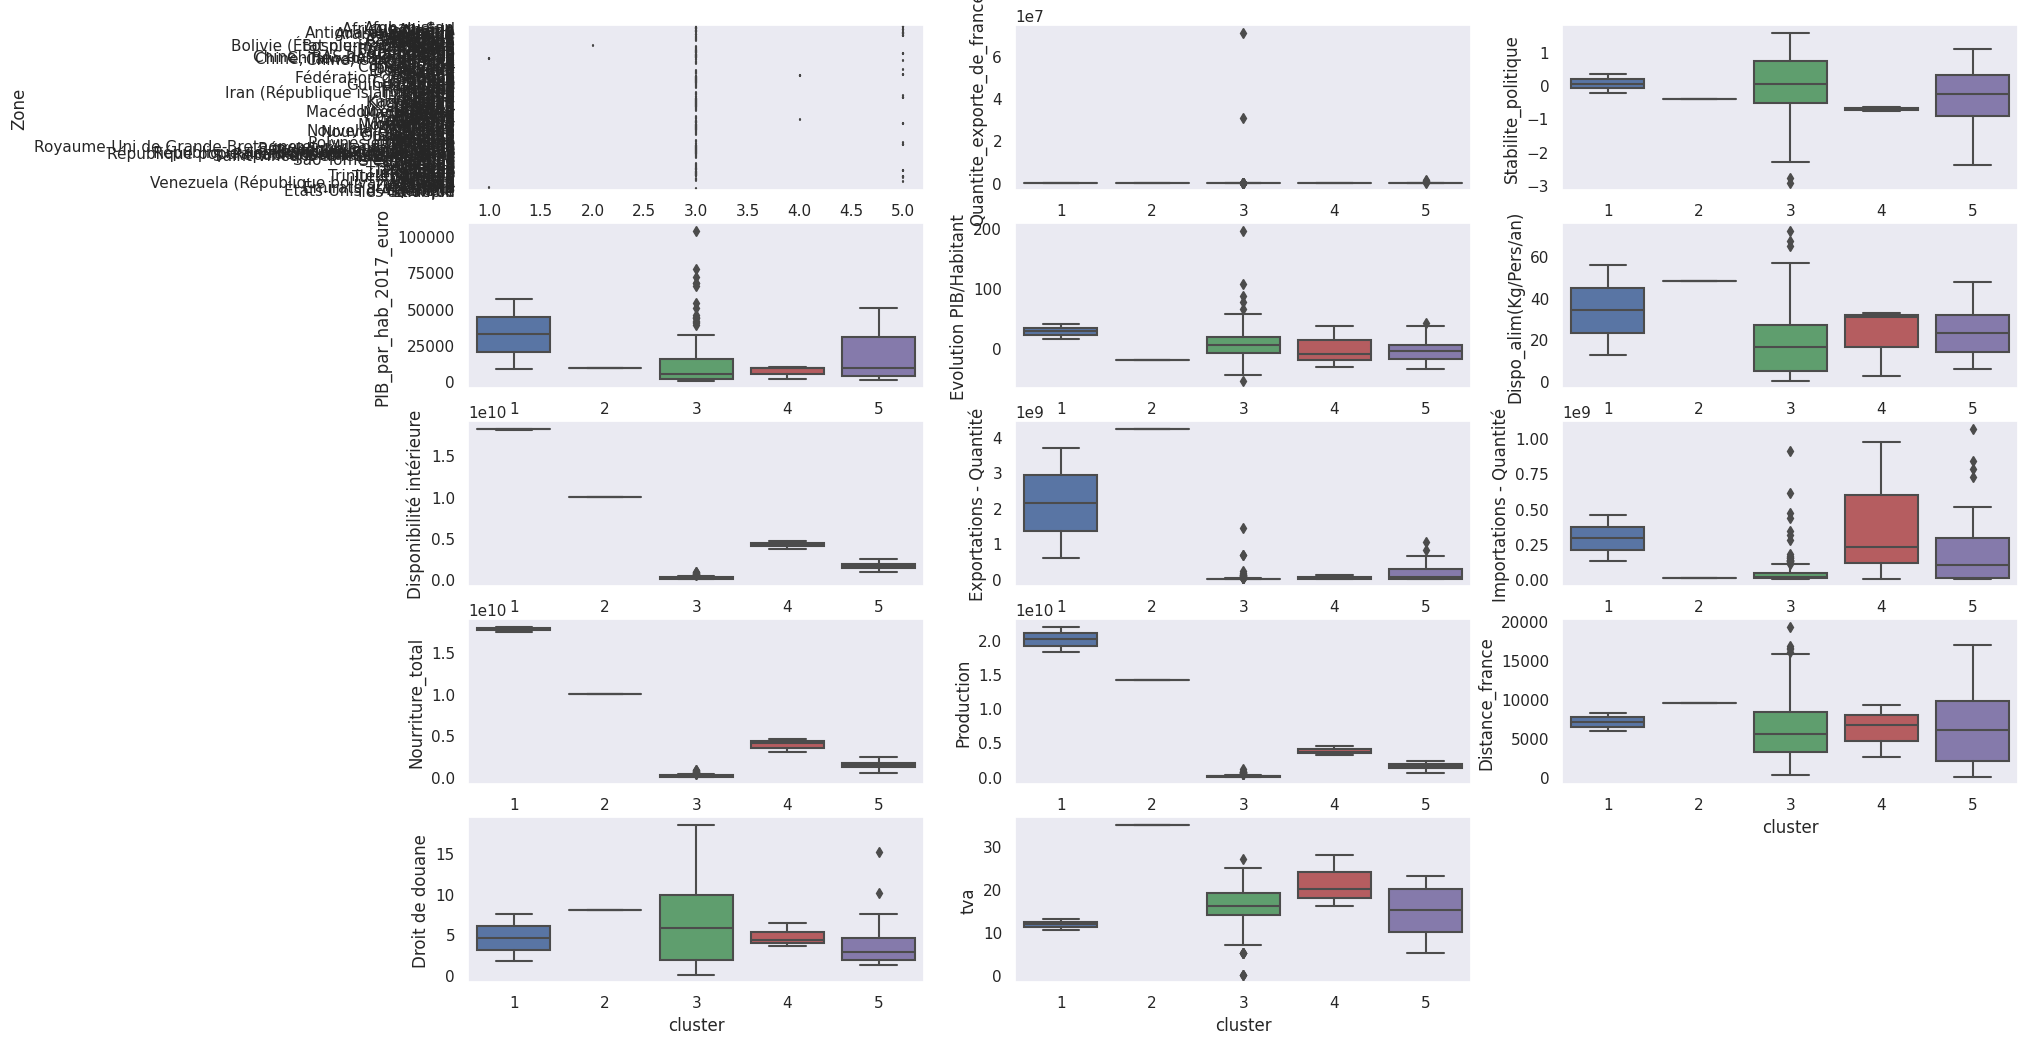

In [932]:
Affichage_boxplot(df_groupes_cah,14)

In [933]:
Affichage_cluster(df_groupes_cah)

Cluster '0' data:
Int64Index([], dtype='int64')
Nombre d'éléments dans le cluster '0': 0

______________________________________________________________
Cluster '1' data:
Int64Index([34, 169], dtype='int64')
Nombre d'éléments dans le cluster '1': 2

______________________________________________________________
Cluster '2' data:
Int64Index([21], dtype='int64')
Nombre d'éléments dans le cluster '2': 1

______________________________________________________________
Cluster '3' data:
Int64Index([  0,   2,   3,   5,   6,   9,  11,  12,  13,  14,
            ...
            159, 160, 161, 163, 164, 165, 167, 168, 170, 171],
           dtype='int64', length=141)
Nombre d'éléments dans le cluster '3': 141

______________________________________________________________
Cluster '4' data:
Int64Index([52, 66, 98], dtype='int64')
Nombre d'éléments dans le cluster '4': 3

______________________________________________________________


In [934]:
#affichage des noms des pays dans chaque groupes (à partir de table_fus)
print('Groupe1')
print(df_groupe1_cah['Zone'].unique())
print('____________________________________________________________')
print('Groupe2')
print(df_groupe2_cah['Zone'].unique())
print('____________________________________________________________')
print('Groupe3')
print(df_groupe3_cah['Zone'].unique())
print('____________________________________________________________')
print('Groupe4')
print(df_groupe4_cah['Zone'].unique())
print('____________________________________________________________')
print('Groupe5')
print(df_groupe5_cah['Zone'].unique())
print('____________________________________________________________')

Groupe1
['Chine, continentale' "États-Unis d'Amérique"]
____________________________________________________________
Groupe2
['Brésil']
____________________________________________________________
Groupe3
['Afghanistan' 'Albanie' 'Algérie' 'Angola' 'Antigua-et-Barbuda' 'Arménie'
 'Autriche' 'Azerbaïdjan' 'Bahamas' 'Bangladesh' 'Barbade' 'Belgique'
 'Belize' 'Bolivie (État plurinational de)' 'Bosnie-Herzégovine'
 'Botswana' 'Bulgarie' 'Burkina Faso' 'Bélarus' 'Bénin' 'Cabo Verde'
 'Cambodge' 'Cameroun' 'Chili' 'Chine - RAS de Hong-Kong'
 'Chine - RAS de Macao' 'Chine, Taiwan Province de' 'Chypre' 'Congo'
 'Costa Rica' 'Croatie' 'Cuba' "Côte d'Ivoire" 'Danemark' 'Djibouti'
 'Dominique' 'El Salvador' 'Estonie' 'Eswatini' 'Fidji' 'Finlande' 'Gabon'
 'Gambie' 'Ghana' 'Grenade' 'Grèce' 'Guatemala' 'Guinée' 'Guinée-Bissau'
 'Guyana' 'Géorgie' 'Haïti' 'Honduras' 'Hongrie' 'Iraq' 'Irlande'
 'Islande' 'Israël' 'Jamaïque' 'Jordanie' 'Kazakhstan' 'Kenya'
 'Kirghizistan' 'Kiribati' 'Koweït' 'Lesoth

# Dendrogramme sur la résultante du PCA

In [935]:
X = df_compo_tot #[['F1','F2','F3','F4','F5','F6','F7']]
Z = linkage(X, method="ward")

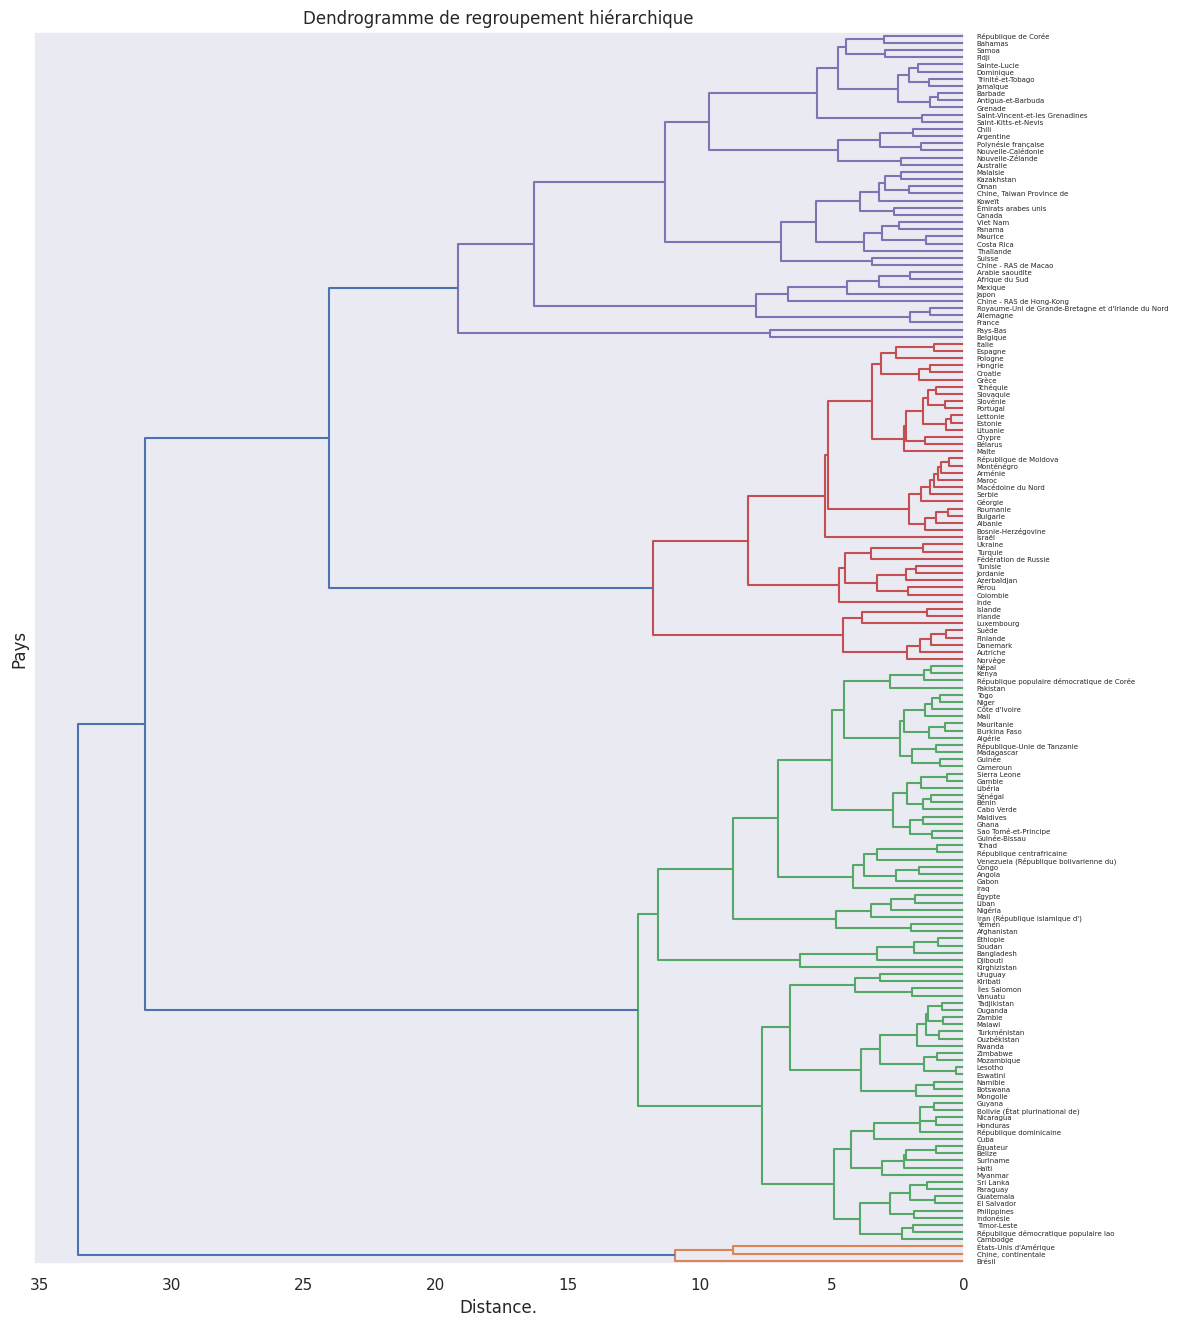

In [936]:
fig, ax = plt.subplots(1, 1, figsize=(12, 16))

_ = dendrogram(Z, labels=df.index, orientation='left') #truncate_mode="lastp"

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Distance.")
plt.ylabel("Pays")
plt.show()

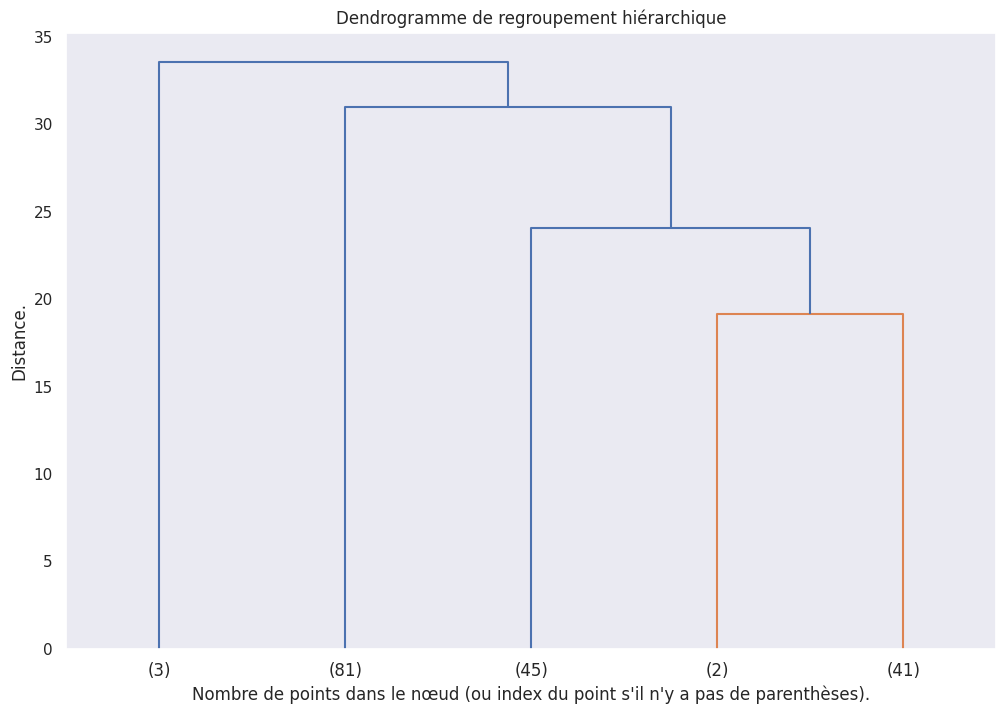

In [937]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=5, truncate_mode="lastp")

plt.title("Dendrogramme de regroupement hiérarchique")
plt.xlabel("Nombre de points dans le nœud (ou index du point s'il n'y a pas de parenthèses).")
plt.ylabel("Distance.")
plt.show()


In [938]:
#Identification des 5 groupes obtenus
groupes_cah_pca = fcluster(Z, 5, criterion='maxclust')
print('Numérotation de nos groupes : ' + str(np.unique(groupes_cah_pca)))

#Index trié des groupes
idg = np.argsort(groupes_cah_pca)

#Affichage des pays selon leurs groupes
df_groupes_cah_pca = pd.DataFrame(df_compo.index[idg], groupes_cah_pca[idg]).reset_index()
df_groupes_cah_pca = df_groupes_cah_pca.rename(columns={'index':'cluster'})



Numérotation de nos groupes : [1 2 3 4 5]


In [939]:
#Intégration des groupes dans notre échantillon de départ représenté par le dataframe "df_alim"
#Jointure interne nécessaire pour parvenir à agréger nos données
df_groupes_cah_pca = pd.merge(df_compo, df_groupes_cah_pca, on='Zone')

In [940]:
#Aperçu des 5 premières lignes
#df_groupes_cah.to_csv('p5_data/pays_groupes5_dendrogramme.csv')
df_groupes_cah_pca.head()



,Zone,F1,F2,F3,F4,F5,F6,F7,cluster
0,Afghanistan,-1.82,3.07,0.31,2.61,-0.35,-1.05,0.69,2
1,Afrique du Sud,1.39,0.31,0.72,1.26,-1.13,-0.01,-0.52,5
2,Albanie,-0.35,-1.41,-1.02,-0.28,0.00,-0.69,0.33,3
3,Algérie,-1.21,0.51,-2.00,0.66,-0.86,0.18,-0.27,2
4,Allemagne,2.79,-2.43,-0.23,2.15,0.16,-0.78,-2.00,5


In [941]:
df_groupe1_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 1]
df_groupe2_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 2]
df_groupe3_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 3]
df_groupe4_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 4]
df_groupe5_cah_pca = df_groupes_cah_pca[df_groupes_cah_pca['cluster'] == 5]

In [942]:
#Première comparaison des moyennes afin d'identifier le groupe de pays le plus porteur à ce niveau de l'analyse
df_groupes_cah_pca.groupby('cluster').mean()



<ipython-input-942-5294a2f59250>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_groupes_cah_pca.groupby('cluster').mean()


,F1,F2,F3,F4,F5,F6,F7
cluster,,,,,,,
1,12.35,4.88,-2.14,-1.34,0.23,0.35,0.37
2,-1.05,1.03,-0.26,0.13,0.13,-0.02,0.09
3,0.34,-1.69,-0.89,-0.37,-0.16,-0.46,0.01
4,2.39,-3.96,-1.61,4.69,4.38,4.84,1.48
5,0.68,-0.35,1.72,0.03,-0.32,0.28,-0.28


In [943]:
df_groupes_cah_pca.rename(columns={'F1' : 'Disponibilité alimentaire', 'F2' : 'Niveau de développement','F3' : 'Diversité alimentaire' , 'F4' : 'Evolution économique', 'F5' : 'Instabilité économique', 'F6' : 'Dépendence alimentaire', 'F7' : 'Compétitivité alimentaire'}, inplace=True)

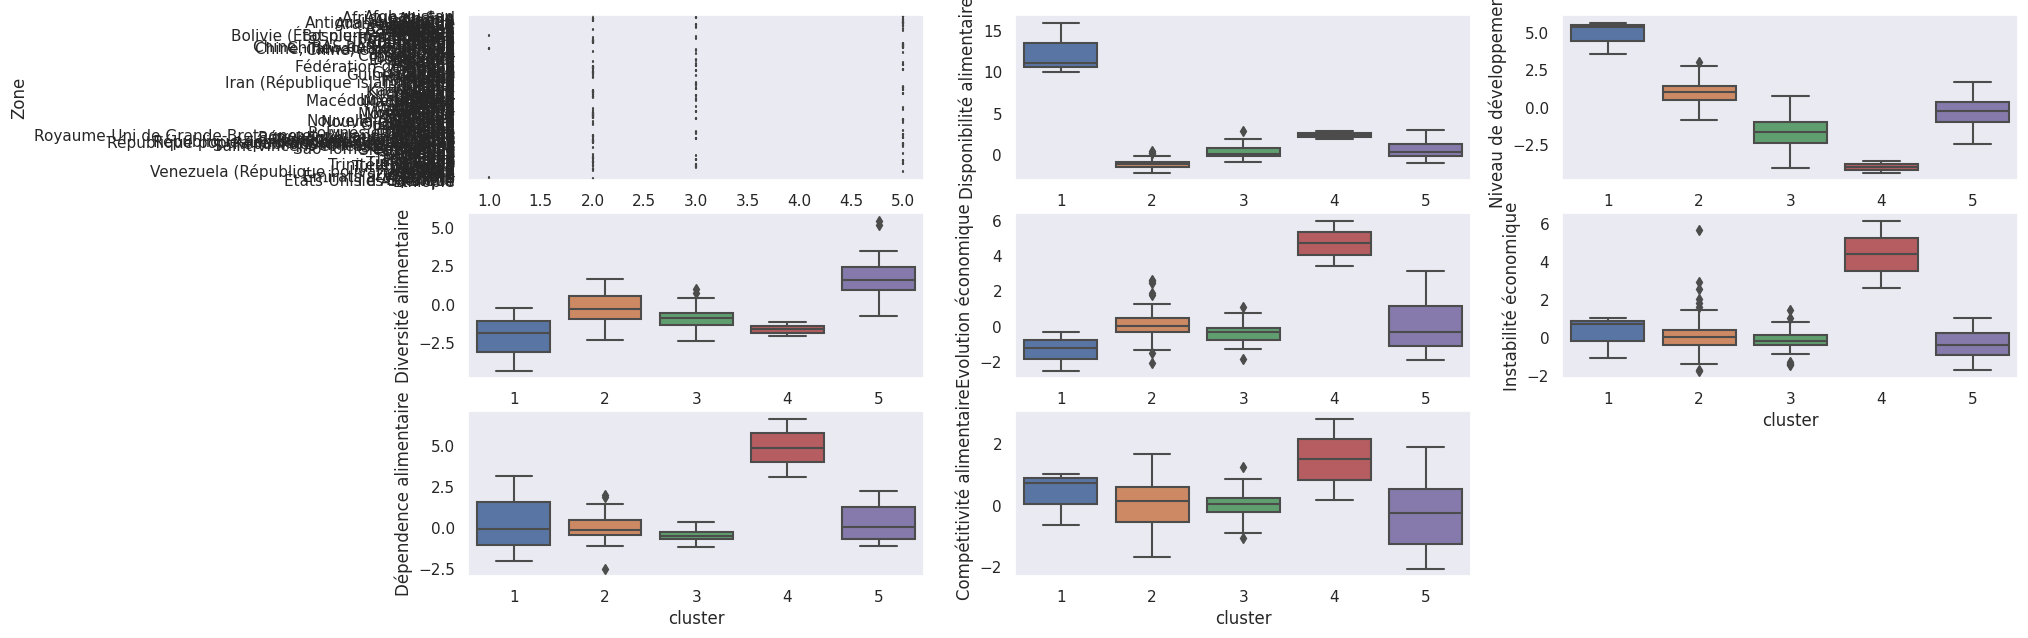

In [944]:
Affichage_boxplot(df_groupes_cah_pca,8)

In [945]:
#affichage des noms des pays dans chaque groupes
print('Groupe1 pca')
print(df_groupe1_cah_pca['Zone'].unique())
print('-----------------------------------------------------------')
print('Groupe1 fichier de base')
print(df_groupe1_cah['Zone'].unique())
print('____________________________________________________________')
print("")
print('Groupe2 pca')
print(df_groupe2_cah_pca['Zone'].unique())
print('-----------------------------------------------------------')
print('Groupe2 fichier de base')
print(df_groupe2_cah['Zone'].unique())
print("")
print('____________________________________________________________')
print('Groupe3 pca')
print(df_groupe3_cah_pca['Zone'].unique())
print('-----------------------------------------------------------')
print('Groupe3 fichier de base')
print(df_groupe3_cah['Zone'].unique())
print("")
print('____________________________________________________________')
print('Groupe4 pca')
print(df_groupe4_cah_pca['Zone'].unique())
print('-----------------------------------------------------------')
print('Groupe4 fichier de base')
print(df_groupe4_cah['Zone'].unique())
print("")
print('____________________________________________________________')
print('Groupe5 pca')
print(df_groupe5_cah_pca['Zone'].unique())
print('-----------------------------------------------------------')
print('Groupe5 fichier de base')
print(df_groupe5_cah['Zone'].unique())
print("")
print('____________________________________________________________')

Groupe1 pca
['Brésil' 'Chine, continentale' "États-Unis d'Amérique"]
-----------------------------------------------------------
Groupe1 fichier de base
['Chine, continentale' "États-Unis d'Amérique"]
____________________________________________________________

Groupe2 pca
['Afghanistan' 'Algérie' 'Angola' 'Bangladesh' 'Belize'
 'Bolivie (État plurinational de)' 'Botswana' 'Burkina Faso' 'Bénin'
 'Cabo Verde' 'Cambodge' 'Cameroun' 'Congo' 'Cuba' "Côte d'Ivoire"
 'Djibouti' 'El Salvador' 'Eswatini' 'Gabon' 'Gambie' 'Ghana' 'Guatemala'
 'Guinée' 'Guinée-Bissau' 'Guyana' 'Haïti' 'Honduras' 'Indonésie'
 "Iran (République islamique d')" 'Iraq' 'Kenya' 'Kirghizistan' 'Kiribati'
 'Lesotho' 'Liban' 'Libéria' 'Madagascar' 'Malawi' 'Maldives' 'Mali'
 'Mauritanie' 'Mongolie' 'Mozambique' 'Myanmar' 'Namibie' 'Nicaragua'
 'Niger' 'Nigéria' 'Népal' 'Ouganda' 'Ouzbékistan' 'Pakistan' 'Paraguay'
 'Philippines' 'Rwanda' 'République centrafricaine'
 'République dominicaine' 'République démocratique pop